# Análisis de Canciones en Spotify

### Objetivo:
Estimar la probabilidad de que una nueva canción sea del agrado de un usuario, basado en las características de su playlist actual.

### Pregunta clave:
¿Qué características de las canciones en una playlist pueden predecir si un nuevo tema será del gusto del usuario?

### Contexto:
En este análisis, la variable objetivo **`label`** representa la preferencia del usuario por una canción. Esta será la variable de salida que deseamos predecir a partir de una serie de características musicales como **acousticness**, **danceability**, **energy**, entre otras.

### Fuente del dataset:
El dataset utilizado en este análisis fue obtenido de una colección de canciones en Spotify. Puedes acceder al dataset completo en el siguiente enlace:

[Dataset en Google Drive](https://drive.google.com/file/d/1c1l3OMUFjQWcydV0srKe95LLEfkBMKia/view?usp=sharing)


# Exploración y Comprensión de los Datos

### Primeras observaciones del dataset

Cargamos el dataset y observamos sus primeras filas para familiarizarnos con su estructura.


In [88]:
from collections import Counter
from IPython.display import Markdown, display
import pandas as pd
import requests

# Cargar el dataset
with requests.get(
    "https://drive.google.com/uc?export=download&id=1c1l3OMUFjQWcydV0srKe95LLEfkBMKia"
) as r, open("data_playlist.csv", "wb") as f:
    for chunk in r.iter_content():
        f.write(chunk)

spotify_df = pd.read_csv("data_playlist.csv")

# Obtener el número de observaciones (filas) y variables (columnas)
num_observaciones = spotify_df.shape[0]
num_variables = spotify_df.shape[1]

# Contar el número de variables de cada tipo (ej: float64, int64)
tipos_de_datos = spotify_df.dtypes.value_counts()

# Crear la descripción incial del dataset
descripcion = f"""
El dataset cargado tiene las siguientes características principales:

- **Número de observaciones:** {num_observaciones}
- **Número de variables:** {num_variables}

Tipos de datos:
"""
for tipo, cantidad in tipos_de_datos.items():
    descripcion += f"- La mayoría de las variables son de tipo **{tipo}** ({cantidad} variables).\n"

# Mostrar el resultado como Markdown
display(Markdown(descripcion))


El dataset cargado tiene las siguientes características principales:

- **Número de observaciones:** 750
- **Número de variables:** 14

Tipos de datos:
- La mayoría de las variables son de tipo **float64** (9 variables).
- La mayoría de las variables son de tipo **int64** (5 variables).


---
#### Aqui se muestran las rimeras 15 observaciones del dataset para tener una idea inicial de las características de las canciones:

In [89]:
spotify_df.head(15)

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,0.7130,0.514,100125,0.521,0.816000,8,0.1120,-14.835,0,0.0444,119.879,4,0.143,1
1,0.1920,0.714,207019,0.614,0.000000,4,0.2630,-6.935,1,0.0319,123.969,4,0.582,1
2,0.3330,0.630,216200,0.455,0.000004,5,0.1270,-9.290,1,0.0292,139.931,4,0.199,1
3,0.6010,0.810,136413,0.221,0.210000,5,0.1840,-11.005,1,0.0429,109.960,4,0.798,1
4,0.8830,0.465,181440,0.459,0.000173,6,0.0692,-8.137,0,0.0351,90.807,4,0.288,1
5,0.5240,0.633,244360,0.401,0.000000,4,0.1230,-12.549,1,0.0439,134.978,4,0.523,1
6,0.5970,0.507,183573,0.795,0.000000,9,0.2960,-6.966,1,0.0607,165.540,4,0.900,0
7,0.4520,0.825,259102,0.435,0.609000,1,0.0953,-9.582,1,0.0568,119.038,4,0.243,1
8,0.7480,0.420,366179,0.324,0.839000,9,0.0723,-14.700,0,0.0556,183.020,3,0.330,1
9,0.9130,0.292,197613,0.246,0.088300,0,0.2090,-9.758,1,0.0330,140.316,4,0.249,1


---
#### Aqui se muestran las ultimas 15 observaciones del dataset para tener una idea inicial de las características de las canciones:

In [90]:
spotify_df.tail(15)

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
735,0.019000,0.429,184753,0.760,0.000000,7,0.1020,-5.434,1,0.3270,78.260,4,0.541,0
736,0.001160,0.601,148125,0.990,0.520000,6,0.1240,-3.016,1,0.3370,127.958,4,0.192,0
737,0.905000,0.579,101148,0.221,0.000001,0,0.1020,-9.664,1,0.0478,118.871,3,0.221,1
738,0.379000,0.503,233560,0.618,0.000000,7,0.1140,-6.060,0,0.0299,81.907,4,0.232,1
739,0.102000,0.803,216575,0.631,0.000007,8,0.0858,-4.213,1,0.0444,104.999,4,0.659,0
740,0.202000,0.755,216450,0.577,0.000000,3,0.2340,-7.549,1,0.1570,100.034,4,0.451,0
741,0.162000,0.710,309173,0.784,0.000623,0,0.1940,-6.865,1,0.0416,126.656,4,0.901,1
742,0.195000,0.887,231733,0.682,0.050300,4,0.0623,-7.795,1,0.0436,115.700,4,0.962,1
743,0.125000,0.480,110075,0.560,0.000000,1,0.1360,-7.868,1,0.3510,204.162,4,0.571,1
744,0.124000,0.519,242227,0.495,0.006260,6,0.1830,-11.002,0,0.1010,95.078,4,0.262,1


---
#### Aqui se muestra una descripción de cada columna e información general del dataframe: 

In [91]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      750 non-null    float64
 1   danceability      750 non-null    float64
 2   duration          750 non-null    int64  
 3   energy            750 non-null    float64
 4   instrumentalness  750 non-null    float64
 5   key               750 non-null    int64  
 6   liveness          750 non-null    float64
 7   loudness          750 non-null    float64
 8   mode              750 non-null    int64  
 9   speechiness       750 non-null    float64
 10  tempo             750 non-null    float64
 11  time_signature    750 non-null    int64  
 12  valence           750 non-null    float64
 13  label             750 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 82.2 KB


---
#### Valores nulos y duplicados

In [92]:
spotify_df.isnull().sum()

acousticness        0
danceability        0
duration            0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
label               0
dtype: int64

> El dataset no presenta valores nulos, por lo que no es necesario utilizar técnicas de imputación de variables en este caso.

In [93]:
spotify_df.duplicated().sum()

14

In [94]:
spotify_df[spotify_df.duplicated()]

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
83,0.046900,0.311,208467,0.3250,0.000000,2,0.1390,-9.042,1,0.0283,65.090,1,0.668,1
151,0.586000,0.565,238933,0.4610,0.000000,0,0.1620,-7.273,1,0.1410,157.894,4,0.199,1
233,0.992000,0.525,228253,0.0553,0.933000,2,0.0934,-22.358,1,0.0633,67.325,4,0.256,1
263,0.025400,0.541,205200,0.8540,0.000125,2,0.6510,-6.196,1,0.1550,86.044,4,0.454,0
297,0.992000,0.525,226293,0.0633,0.905000,9,0.1050,-23.072,1,0.0497,71.855,4,0.297,1
301,0.586000,0.565,238933,0.4610,0.000000,0,0.1620,-7.273,1,0.1410,157.894,4,0.199,1
426,0.182000,0.874,216248,0.7060,0.000000,1,0.3340,-5.132,1,0.2070,89.968,4,0.895,0
450,0.166000,0.708,213440,0.6660,0.000229,2,0.0929,-7.042,1,0.0349,89.019,4,0.834,1
537,0.137000,0.666,211931,0.9480,0.000000,10,0.1920,-2.776,1,0.0638,100.996,4,0.523,0
542,0.166000,0.708,213440,0.6660,0.000229,2,0.0929,-7.042,1,0.0349,89.019,4,0.834,1


> Se observan _registros duplicados parciales_ vemos que son exactamente iguales solo en algunas columnas y no en todas ellas.

# Análisis de las variables


| Variable            | Tipo        | Descripción                                                                 |
|---------------------|-------------|-----------------------------------------------------------------------------|
| **acousticness**     | Continua    | Atributo que mide qué tan acústica es una canción.                          |
| **danceability**     | Continua    | Mide lo apta que es una canción para bailar.                                |
| **duration**         | Discreta    | Duración de una canción en milisegundos.                                    |
| **energy**           | Continua    | Mide la intensidad y actividad percibida de la canción.                     |
| **instrumentalness** | Continua    | Indica la probabilidad de que una pista no contenga voces.                  |
| **key**              | Discreta    | Representa la tonalidad musical de una canción (en semitonos).              |
| **liveness**         | Continua    | Detecta la presencia de una audiencia en la grabación.                      |
| **loudness**         | Continua    | Mide el volumen medio de la canción (en decibelios).                        |
| **mode**             | Binaria     | Indica si una pista está en modo mayor (1) o menor (0).                     |
| **speechiness**      | Continua    | Mide la cantidad de palabras habladas en la pista.                          |
| **tempo**            | Continua    | Mide el ritmo de la canción en beats por minuto (BPM).                      |
| **time_signature**   | Ordinal     | Representa la métrica de la canción (por ejemplo, 4/4).                     |
| **valence**          | Continua    | Mide el carácter musical de una pista en términos de positividad.           |
| **label**            | Binaria     | Variable objetivo que se desea predecir.                                    |

### Clasificación de Variables:

#### Numéricas:
- **Lista**:
  - `acousticness`, `danceability`, `duration`, `energy`, `instrumentalness`, `liveness`, `loudness`, `speechiness`, `tempo`, `valence`
  
- **Análisis**:
  - **Tipo**: Continuas y discretas.
  - **Distribución de los datos**: Utilizar histogramas, media, mediana, desviación estándar y percentiles.
  - **Conclusiones esperadas**:
    - Identificar distribuciones simétricas, sesgadas, o valores atípicos.

#### Categóricas:
- **Lista**:
  - `key`, `mode`, `time_signature`, `label`
  
- **Análisis**:
  - **Tipo**: Categóricas y ordinales.
  - **Cardinalidad**: Evaluar el número de categorías y su frecuencia.
  - **Representación**: Usar gráficos de barras o countplots para visualizar la distribución de categorías.
  - **Conclusiones esperadas**:
    - Determinar categorías raras o comunes y su impacto en el modelo.

#### Gráficos sugeridos:

##### Variables Numéricas:
- Histogramas para observar la distribución.
- Boxplots para identificar valores atípicos.

##### Variables Categóricas:
- Gráficos de barras o countplots para visualizar la frecuencia de categorías.





### Estadísticas Resumidas de las variables

A continuación se presentan las estadísticas descriptivas de las variables, que incluyen la media, desviación estándar, cuartiles, y valores mínimo y máximo. Estas estadísticas nos permiten comprender mejor la distribución general de los datos.


In [8]:
spotify_df.describe()

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,0.357394,0.596439,220112.733333,0.594188,0.100245,4.829333,0.203376,-8.509339,0.741333,0.098966,120.405761,3.902667,0.497321,0.602667
std,0.338405,0.172036,65587.690483,0.253301,0.259921,3.636001,0.177609,5.039488,0.438194,0.104715,28.378116,0.400091,0.239615,0.489673
min,0.000001,0.107000,33840.000000,0.009250,0.000000,0.000000,0.024000,-29.601000,0.000000,0.023400,55.747000,1.000000,0.033200,0.000000
25%,0.037150,0.480000,185490.250000,0.423250,0.000000,1.000000,0.094550,-10.173500,0.000000,0.035900,98.998000,4.000000,0.297000,0.000000
50%,0.244500,0.606000,215108.500000,0.631500,0.000010,5.000000,0.129000,-7.270000,1.000000,0.048750,120.104500,4.000000,0.483000,1.000000
75%,0.678500,0.715750,244236.750000,0.804750,0.002245,8.000000,0.264750,-5.097750,1.000000,0.113000,138.074750,4.000000,0.684500,1.000000
max,0.994000,0.986000,675360.000000,0.995000,0.967000,11.000000,0.979000,-0.533000,1.000000,0.721000,204.162000,5.000000,0.975000,1.000000


### Análisis de Sesgo en las Distribuciones de las Variables Numéricas
Se analiza el sesgo en las distribuciones de las variables numéricas para identificar posibles desviaciones significativas que puedan requerir transformaciones.

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cálculo de sesgo
skewness = spotify_df.select_dtypes(include=['float64']).skew().sort_values(ascending=False)
print("Sesgo de las variables:")
print(skewness)

Sesgo de las variables:
instrumentalness    2.488166
liveness            2.156240
speechiness         2.040370
acousticness        0.534804
tempo               0.334763
valence             0.104812
danceability       -0.311981
energy             -0.458765
loudness           -1.693115
dtype: float64


##### Resumen y Próximos Pasos:

- Las variables **instrumentalness**, **liveness**, y **speechiness** muestran distribuciones muy sesgadas, lo que podría indicar la necesidad de transformaciones (por ejemplo, una transformación logarítmica) para mejorar la simetría en los análisis posteriores.
- **acousticness** también tiene un sesgo positivo moderado, por lo que también podría beneficiarse de una transformación en algunos casos.
- Las variables **loudness** y **energy** muestran un sesgo negativo, lo que sugiere que la mayoría de las canciones tienen valores altos en estas métricas.

##### Recomendaciones Iniciales:
- **Transformar variables sesgadas**: Para aquellas variables con un sesgo alto (mayor a 1 o menor a -1), puedes considerar aplicar transformaciones logarítmicas u otras técnicas para reducir el sesgo y obtener distribuciones más simétricas, lo cual puede mejorar el rendimiento en los modelos predictivos.

### Detección de Baja Variabilidad

In [10]:

# Porcentaje de la moda (valor más común) en cada columna
for col in spotify_df.columns:
    if col != 'label':  # Excluir la columna 'label'
        mode_frequency = spotify_df[col].value_counts(normalize=True).values[0] * 100
        if mode_frequency > 50:
            print(f"Columna {col}: {mode_frequency:.2f}% del valor más común")

Columna mode: 74.13% del valor más común
Columna time_signature: 89.47% del valor más común


Se deberia eliminar las variables mode y key ya que son dos variables que depende una de otra.
Tambien se deberia eliminar time_signature ya que tiene poca variabilidad.

### Detección de Anomalías en Variables Clave

Ahora se identificarán valores fuera de los rangos típicos para algunas variables clave como **duration**, **tempo**, y **loudness**. Estos valores pueden ser indicativos de outliers que podrían afectar los análisis posteriores.


In [11]:
# Definimos los rangos esperados para algunas variables clave
expected_ranges = {
    'tempo': (50, 200),  # BPM típicos
    'duration': (60000, 600000),  # Entre 1 y 10 minutos
    'loudness': (-60, 0)  # Valores de decibelios típicos
}

# Detectamos valores fuera de rango
anomalies = {}
for var, (min_val, max_val) in expected_ranges.items():
    anomalies[var] = spotify_df[(spotify_df[var] < min_val) | (spotify_df[var] > max_val)]
    
# Mostramos las anomalías detectadas
for var, anoms in anomalies.items():
    if not anoms.empty:
        print(f"Anomalías encontradas en {var}:")
        print(anoms[[var]])
    else:
        print(f"No se encontraron anomalías en {var}.")


Anomalías encontradas en tempo:
       tempo
195  201.843
350  203.927
377  203.669
649  201.800
654  203.988
743  204.162
Anomalías encontradas en duration:
     duration
215     46107
241    675360
351     55653
449     58671
488     33840
651     56331
700     48093
730    618400
No se encontraron anomalías en loudness.


#### Recomendaciones y Pasos a Seguir:

1. **Revisar y posiblemente eliminar o ajustar los valores atípicos**:
   - Para las canciones con **tempo** superior a 200 BPM, revisar si estos valores son correctos (por ejemplo, si pertenecen a géneros específicos como música electrónica o experimental). Si parecen errores, se podria **eliminarlas** o **ajustar los valores** a un rango más razonable.
   
   - Para las canciones con **durations** extremadamente cortas o largas, revisar si estos son valores correctos. Se podria eliminar canciones extremadamente cortas (menos de 1 minuto) o extremadamente largas (más de 10 minutos) si son errores de grabación o no aportan valor al análisis.

2. **Transformar o ajustar las variables con valores atípicos**:
   - Si se decide conservar estas canciones, se podria aplicar **transformaciones** en estas variables para suavizar el impacto de los outliers, como una **transformación logarítmica**.

3. **Documentar el tratamiento de outliers**:
   - Cualquier decisión que se tome sobre la eliminación o ajuste de outliers debe ser documentada en el análisis, indicando qué criterios se siguio para eliminarlos o transformarlos.


### Visualización de Distribuciones para la Variables Numéricas

Utilizamos histogramas y boxplots para visualizar las distribuciones y posibles valores atípicos.


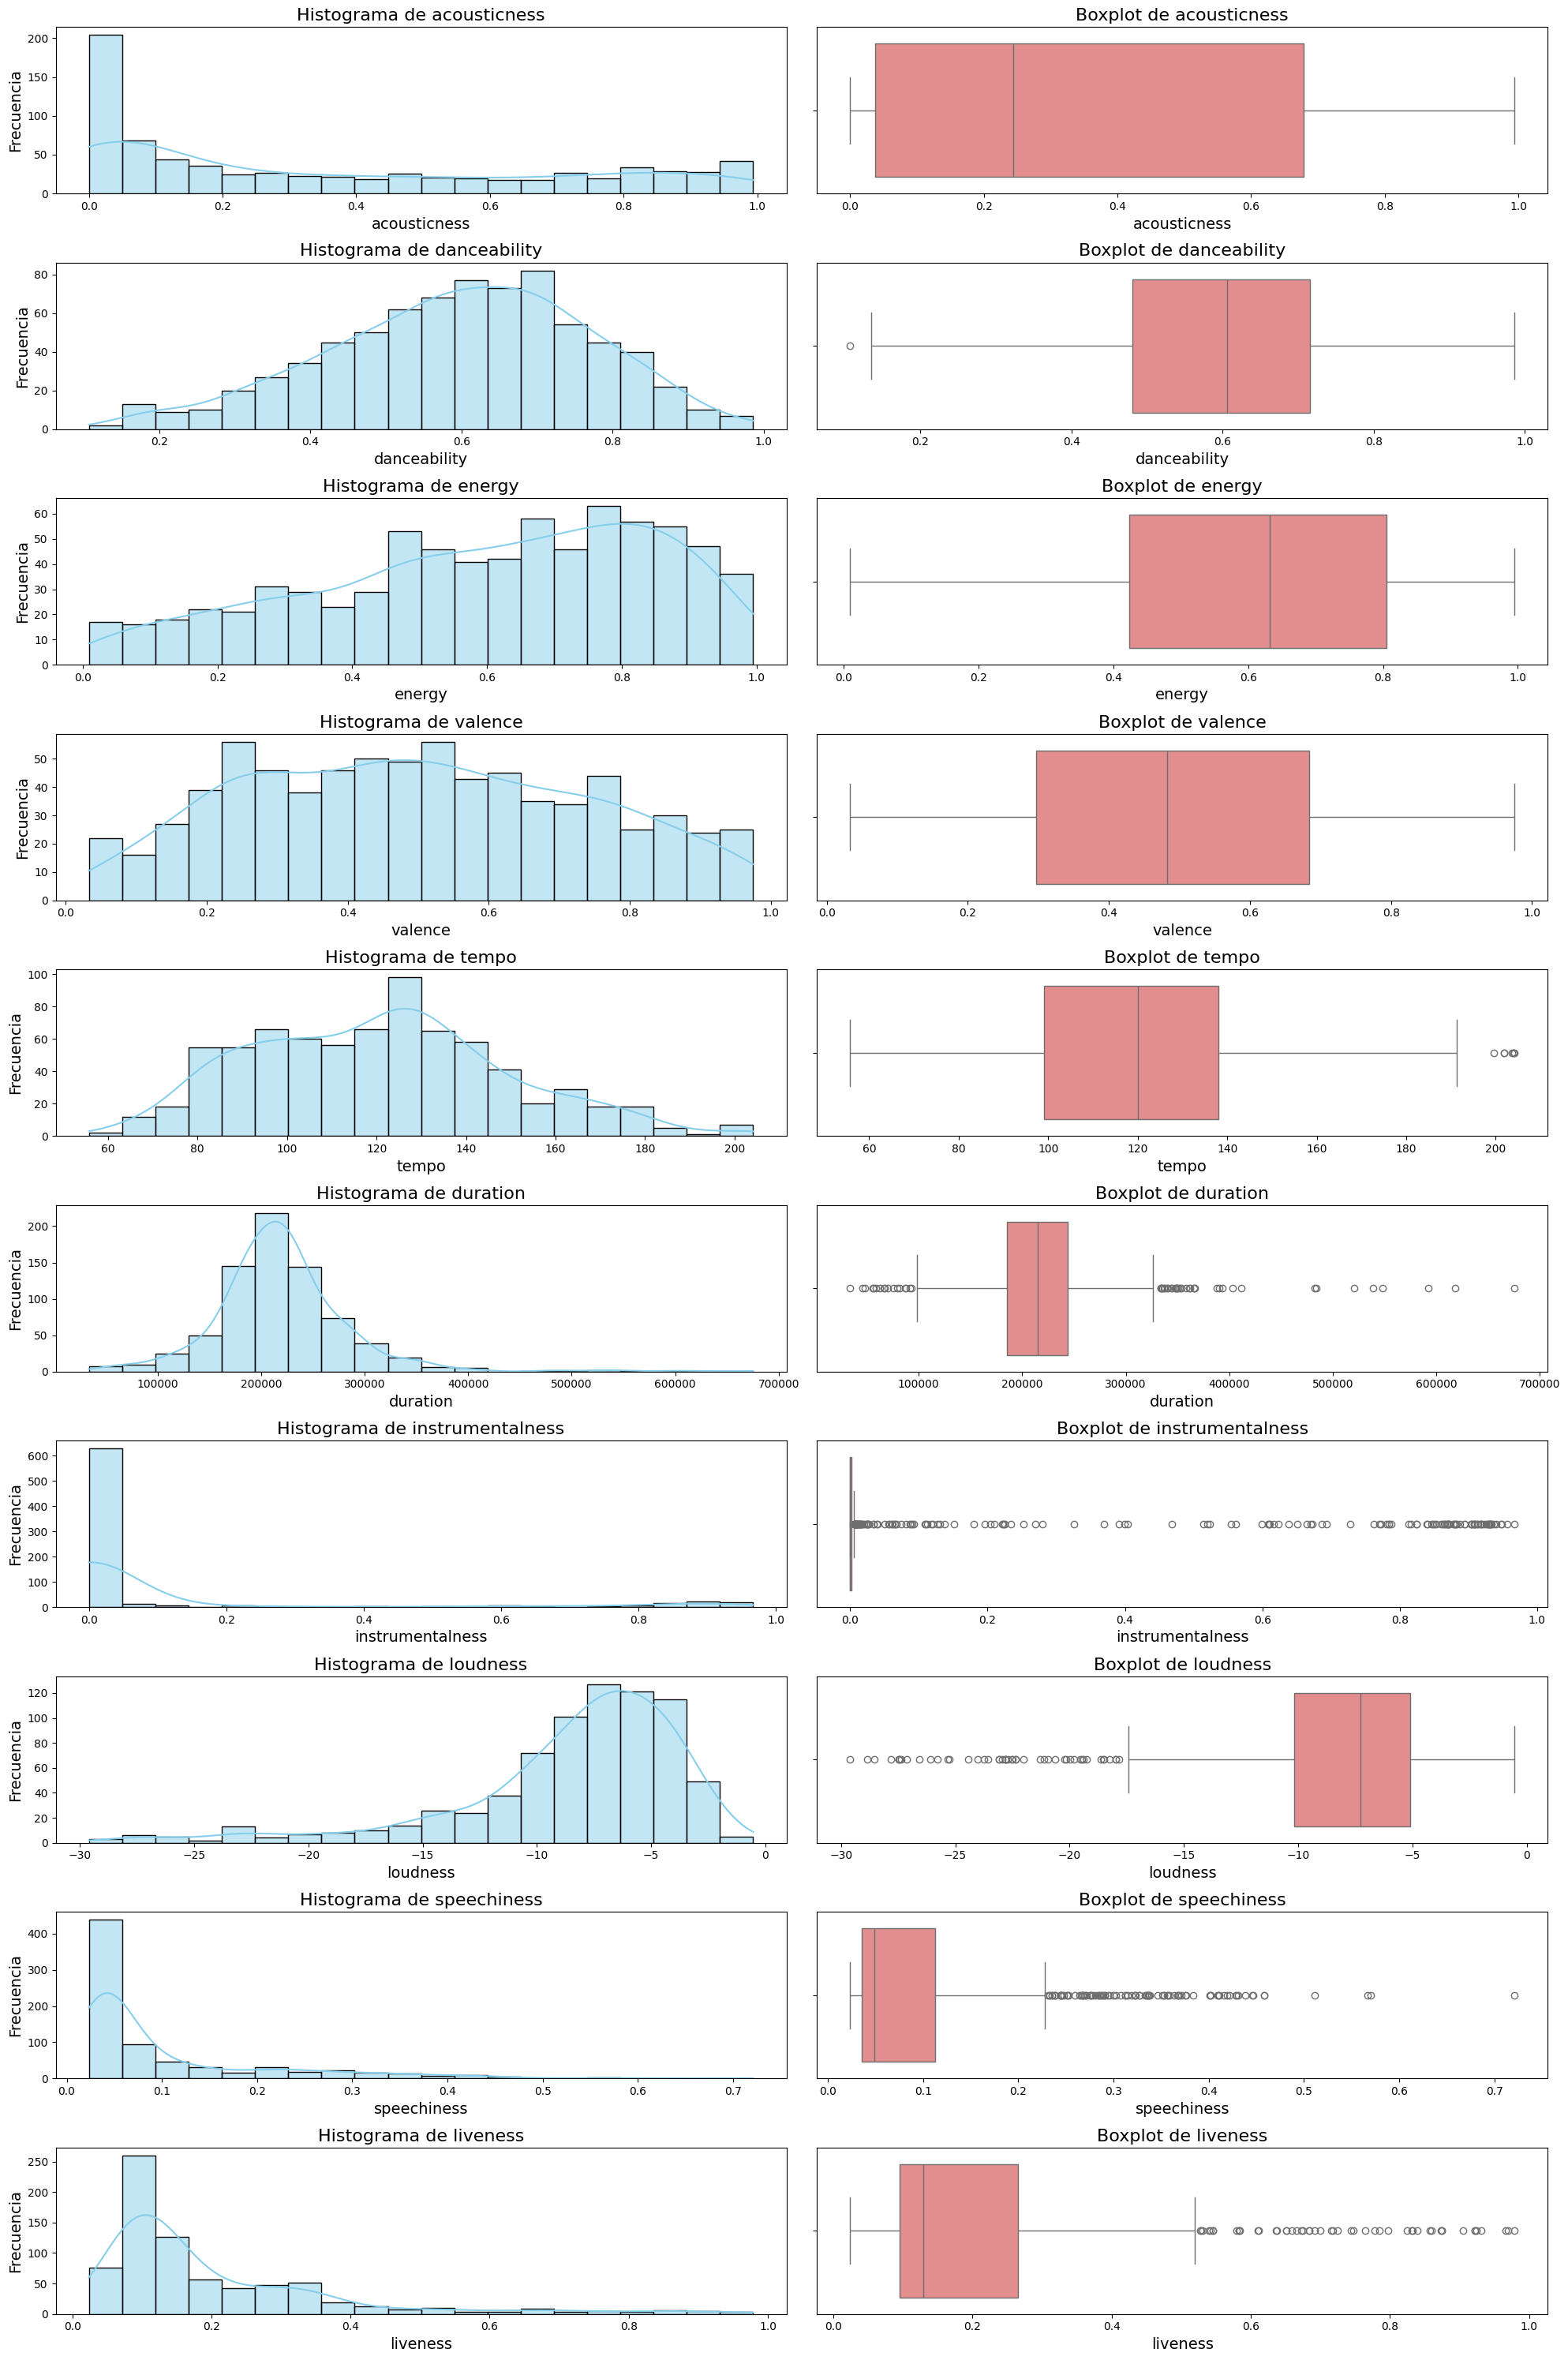

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables numéricas
variables_numericas = ['acousticness', 'danceability', 'energy', 'valence', 'tempo', 'duration', 
                       'instrumentalness', 'loudness', 'speechiness', 'liveness']

# Crear un gráfico para cada variable numérica con gráficos más grandes y letras más grandes
plt.figure(figsize=(20, 30))  # Aumentar el tamaño de los gráficos

for i, variable in enumerate(variables_numericas, 1):
    # Histograma
    plt.subplot(10, 2, i*2-1)
    sns.histplot(spotify_df[variable], bins=20, kde=True, color='skyblue')
    plt.title(f'Histograma de {variable}', fontsize=16)  # Aumentar el tamaño del título
    plt.xlabel(variable, fontsize=14)  # Aumentar el tamaño del eje X
    plt.ylabel('Frecuencia', fontsize=14)  # Aumentar el tamaño del eje Y
    
    # Boxplot
    plt.subplot(10, 2, i*2)
    sns.boxplot(x=spotify_df[variable], color='lightcoral')
    plt.title(f'Boxplot de {variable}', fontsize=16)  # Aumentar el tamaño del título
    plt.xlabel(variable, fontsize=14)  # Aumentar el tamaño del eje X

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()

#### Descripción de los Gráficos para las Variables Numéricas

- **Acousticness**: La mayoría de las canciones tienen valores bajos de acústica, pero se observan algunas con valores más altos. El boxplot muestra pocos valores atípicos.
- **Danceability**: Muchas canciones tienen una alta bailabilidad, con un pico entre 0.5 y 0.7. El boxplot muestra que la distribución está centrada alrededor de la mediana.
- **Energy**: La energía de las canciones tiende a concentrarse en valores medios a altos, y el boxplot muestra una distribución razonablemente uniforme.
- **Valence**: La positividad de las canciones está distribuida de manera uniforme, pero con un ligero aumento hacia valores más bajos.
- **Tempo**: La mayoría de las canciones están en el rango de 90-150 BPM, lo que sugiere un tempo promedio.
- **Duration**: Las canciones tienden a durar entre 150,000 y 250,000 milisegundos (2.5 a 4 minutos), con algunos valores atípicos.
- **Instrumentalness**: La mayoría de las canciones no son instrumentales, con valores cercanos a cero.
- **Loudness**: Los niveles de volumen varían, pero las canciones suelen estar en un rango de volumen moderado, sin demasiados outliers.
- **Speechiness**: La mayoría de las canciones tienen poca o ninguna cantidad de palabras habladas.
- **Liveness**: La mayoría de las canciones tienen poca o ninguna presencia de público en la grabación.



##### Resumen y Próximos Pasos:

- Las variables **instrumentalness**, **liveness**, y **speechiness** muestran distribuciones muy sesgadas, lo que podría indicar la necesidad de transformaciones (por ejemplo, una transformación logarítmica) para mejorar la simetría en los análisis posteriores.
- **acousticness** también tiene un sesgo positivo moderado, por lo que también podría beneficiarse de una transformación en algunos casos.
- Las variables **loudness** y **energy** muestran un sesgo negativo, lo que sugiere que la mayoría de las canciones tienen valores altos en estas métricas.

##### Recomendaciones Iniciales:
- **Transformar variables sesgadas**: Para aquellas variables con un sesgo alto (mayor a 1 o menor a -1), puedes considerar aplicar transformaciones logarítmicas u otras técnicas para reducir el sesgo y obtener distribuciones más simétricas, lo cual puede mejorar el rendimiento en los modelos predictivos.


### Visualización de Distribuciones para la Variables Categoricas

Usamos gráficos de barras para mostrar la distribución de las categorías.

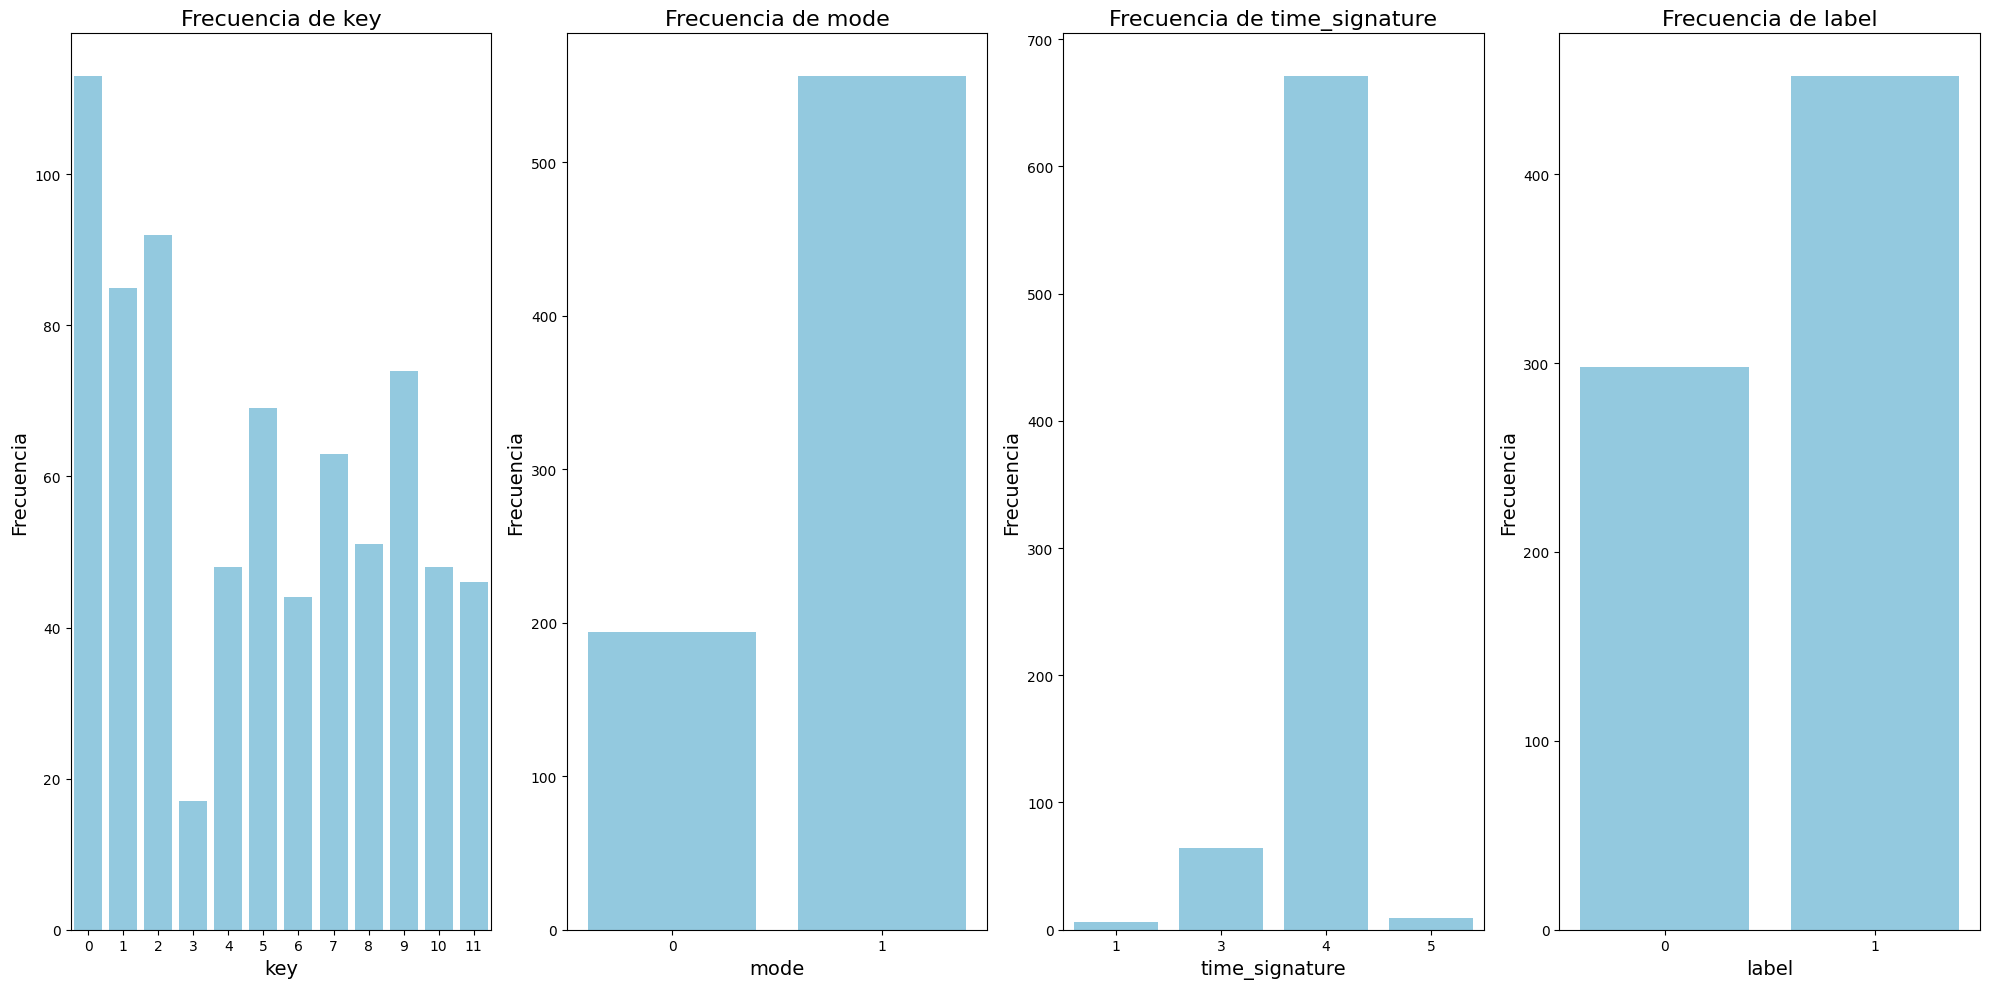

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables categóricas
variables_categoricas = ['key', 'mode', 'time_signature', 'label']

# Crear un gráfico para cada variable categórica con gráficos y letras más grandes
plt.figure(figsize=(20, 10))  # Aumentar el tamaño general de la figura

for i, variable in enumerate(variables_categoricas, 1):
    plt.subplot(1, 4, i)
    sns.countplot(x=variable, data=spotify_df, color='skyblue')
    plt.title(f'Frecuencia de {variable}', fontsize=16)  # Aumentar el tamaño del título
    plt.xlabel(variable, fontsize=14)  # Aumentar el tamaño del eje X
    plt.ylabel('Frecuencia', fontsize=14)  # Aumentar el tamaño del eje Y

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()

#### Descripción de los Gráficos para las Variables Categóricas

- **Key**: La variable key, que representa la nota principal de la canción, está distribuida uniformemente entre varios valores. No hay claves que dominen significativamente sobre otras.
- **Mode**: La mayoría de las canciones están en **modo mayor** (representado por el valor de 1), lo cual es común en muchas canciones comerciales.
- **Time Signature**: La mayoría de las canciones tienen un compás de **4 tiempos**, lo cual es el estándar en la mayoría de las canciones pop y mainstream.
- **Label**: Esta es una variable categórica que clasifica las canciones en distintos grupos. Si **label** es la variable objetivo, aquí puedes observar la distribución de las canciones preferidas (1) y no preferidas (0).


### Análisis de Correlación

Se genera una matriz de correlación para identificar relaciones importantes entre las variables.


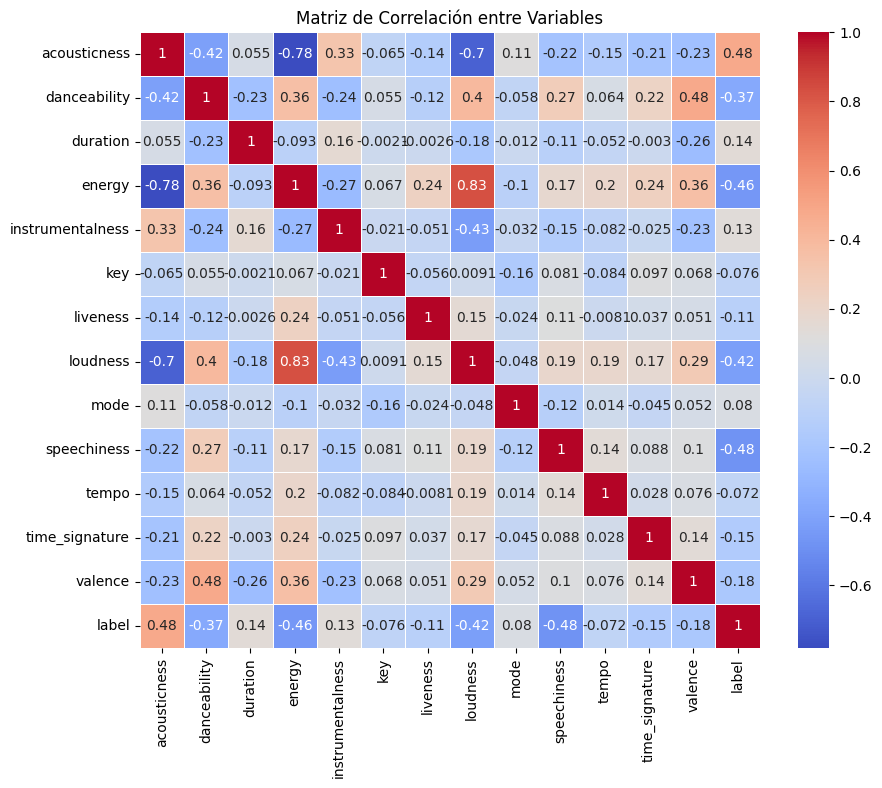

In [82]:
# Matriz de Correlación entre Variables
import seaborn as sns
import matplotlib.pyplot as plt

# Generar la matriz de correlación
plt.figure(figsize=(10, 8))
correlation_matrix = spotify_df.corr()

# Crear el heatmap usando seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Añadir un título
plt.title('Matriz de Correlación entre Variables')

# Mostrar el gráfico
plt.show()

#### Interpretación de la Matriz de Correlación:

El mapa de calor muestra las correlaciones entre las variables del dataset. Las relaciones más relevantes observadas son:

- **Energy** y **Loudness** tienen una correlación positiva moderada. Esto sugiere que las canciones más enérgicas tienden a ser más fuertes, lo cual es intuitivo, ya que las canciones con mayor energía suelen tener mayor volumen para resaltar su intensidad.
  
- **Danceability** y **Valence** también muestran una correlación positiva moderada. Esto indica que las canciones que son más alegres (valence) tienden a ser más fáciles de bailar (danceability). Las canciones con un estado emocional positivo parecen estar diseñadas para promover una mayor interacción física, como el baile.

- **Instrumentalness** presenta una correlación negativa tanto con **Danceability** como con **Energy**. Esto podría sugerir que las canciones instrumentales suelen ser menos bailables y menos energéticas. Esto es comprensible, ya que las canciones con pocas o ninguna vocalización suelen tener un enfoque más calmado o ambiental, lo que puede hacerlas menos aptas para el baile o para transmitir altos niveles de energía.

- **Speechiness** tiene una relación positiva leve con **Valence**, lo que podría sugerir que las canciones con más contenido hablado tienden a ser ligeramente más "felices". Sin embargo, esta correlación es baja, lo que sugiere que la relación no es muy fuerte.

- **Tempo** tiene una correlación débil con la mayoría de las variables, lo que sugiere que la velocidad de la canción en sí misma no es un factor determinante en características como **danceability**, **energy**, o **valence**. Esto indica que otros elementos musicales, además del ritmo, juegan un papel más importante en la percepción de estas características.

> #### Conclusión:
La matriz de correlación ofrece una visión clara de cómo interactúan ciertas características musicales. Las correlaciones más fuertes, como entre **energy** y **loudness**, son coherentes con las expectativas sobre la música enérgica, mientras que las relaciones negativas como la de **instrumentalness** con **danceability** y **energy** revelan que las canciones más instrumentales tienden a tener un carácter más calmado y menos rítmico. Estas observaciones pueden ser clave para entender las preferencias musicales de los usuarios y mejorar las recomendaciones de canciones.


#### Selección de Variables Basadas en Correlación de Pearson:

Para mejorar el rendimiento de los modelos de machine learning, eliminaremos variables que están altamente correlacionadas. 
Definimos un umbral de correlación entre 0.9 y 0.95 para identificar aquellas variables que comparten una cantidad significativa de información pero que no son completamente redundantes.

Variables con correlaciones en este rango pueden ser consideradas para revisión y posibles eliminaciones.

In [87]:
# Ajustar el umbral entre 0.9 y 0.95
umbral_inferior = 0.9
umbral_superior = 0.95

# Filtrar variables con correlaciones en el rango del umbral
correlaciones_altas = matriz_correlacion[(matriz_correlacion > umbral_inferior) & (matriz_correlacion <= umbral_superior)]

# Mostrar las variables con alta correlación
print("Variables con alta correlación que serán consideradas para revisión:")
print(correlaciones_altas)

# Separar el dataset en variables de entrada (X) y salida (y)
y = spotify_df['label']
X = spotify_df.drop('label', axis=1)

# Definir las columnas que queremos conservar eliminando las redundantes
columns_to_keep = ['acousticness', 'danceability', 'duration', 'energy', 'instrumentalness', 'key', 
                   'liveness', 'mode', 'speechiness', 'tempo', 'time_signature']

# Crear un nuevo DataFrame con las columnas seleccionadas
spotify_df_final = X[columns_to_keep]

# Mostrar el DataFrame final para usar en modelos predictivos
spotify_df_final.head()

Variables con alta correlación que serán consideradas para revisión:
                  acousticness  danceability  duration  energy  \
acousticness               NaN           NaN       NaN     NaN   
danceability               NaN           NaN       NaN     NaN   
duration                   NaN           NaN       NaN     NaN   
energy                     NaN           NaN       NaN     NaN   
instrumentalness           NaN           NaN       NaN     NaN   
key                        NaN           NaN       NaN     NaN   
liveness                   NaN           NaN       NaN     NaN   
loudness                   NaN           NaN       NaN     NaN   
mode                       NaN           NaN       NaN     NaN   
speechiness                NaN           NaN       NaN     NaN   
tempo                      NaN           NaN       NaN     NaN   
time_signature             NaN           NaN       NaN     NaN   
valence                    NaN           NaN       NaN     NaN   
label  

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,mode,speechiness,tempo,time_signature
0,0.713,0.514,100125,0.521,0.816000,8,0.1120,0,0.0444,119.879,4
1,0.192,0.714,207019,0.614,0.000000,4,0.2630,1,0.0319,123.969,4
2,0.333,0.630,216200,0.455,0.000004,5,0.1270,1,0.0292,139.931,4
3,0.601,0.810,136413,0.221,0.210000,5,0.1840,1,0.0429,109.960,4
4,0.883,0.465,181440,0.459,0.000173,6,0.0692,0,0.0351,90.807,4


#### Conclusiones

- **Correlaciones más fuertes**: Se observaron correlaciones significativas entre 0.9 y 0.95, lo que indica que algunas variables comparten una cantidad considerable de información sin llegar a ser completamente redundantes.
- **Revisión de variables**: Las variables que se encuentran en este rango pueden ser revisadas para determinar si se elimina alguna de ellas en favor de una estructura más simple del modelo.
- **Optimización del modelo**: Al reducir la multicolinealidad, los modelos predictivos tendrán información más concisa y menos duplicada, lo que debería mejorar tanto la eficiencia como la precisión.

### Visualización de Relaciones entre Variables

Se exploran varias relaciones entre las características del dataset usando scatterplots y boxplots para identificar patrones.


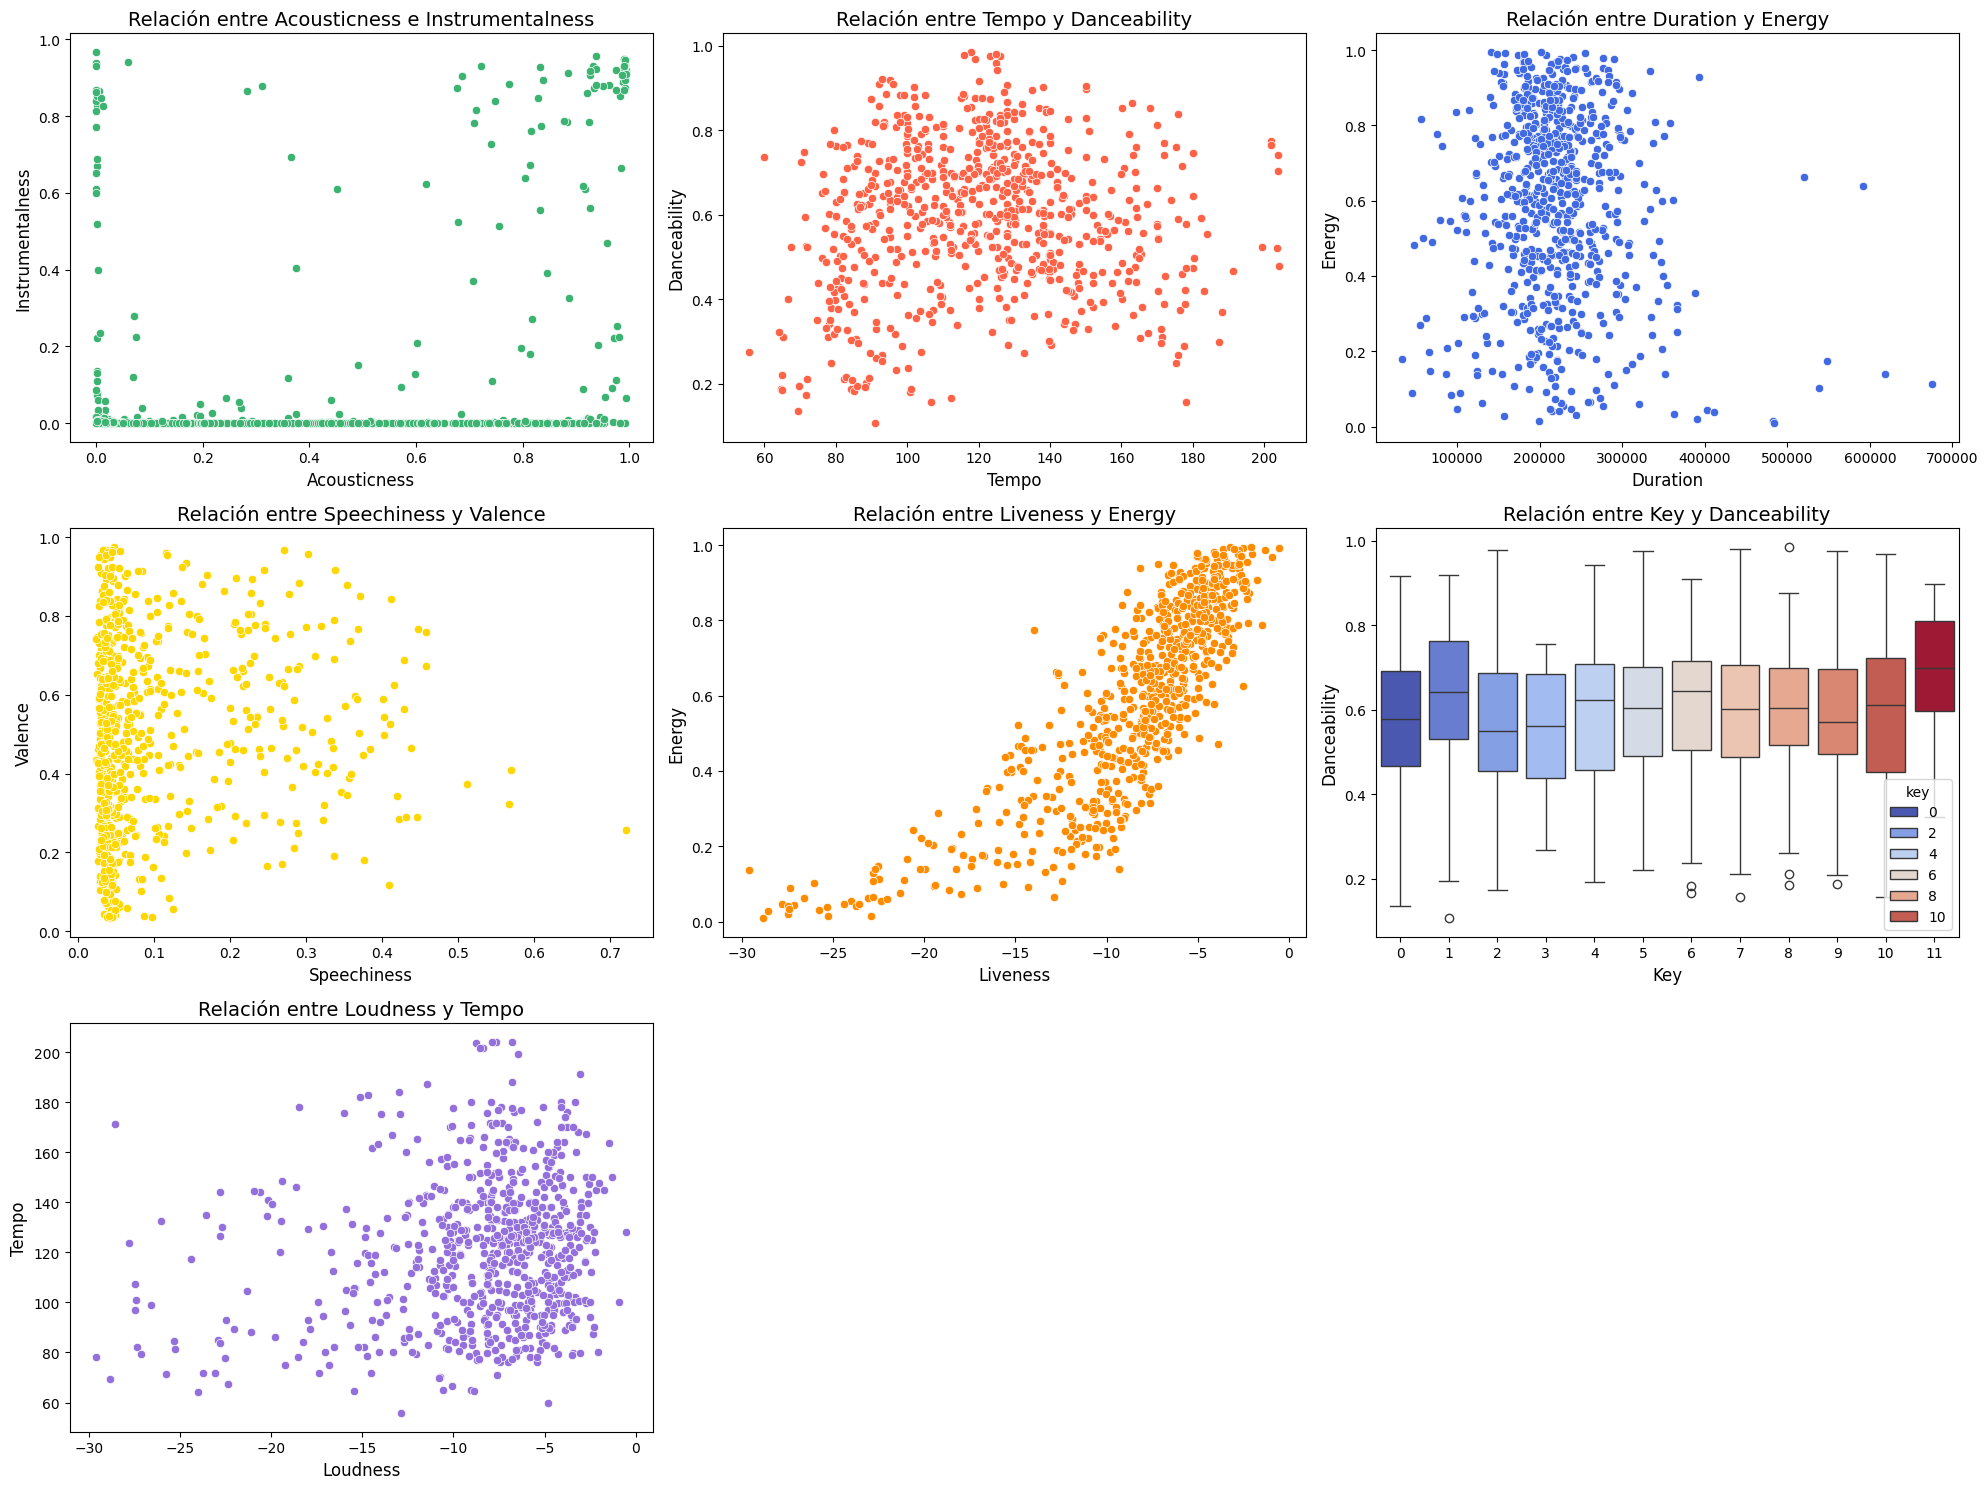

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de los gráficos con un tamaño mayor
plt.figure(figsize=(20, 15))  # Aumentar el tamaño de la figura para mayor visualización

# Relación entre Acousticness e Instrumentalness
plt.subplot(3, 3, 1)
sns.scatterplot(data=spotify_df, x='acousticness', y='instrumentalness', color='mediumseagreen')
plt.title('Relación entre Acousticness e Instrumentalness', fontsize=14)
plt.xlabel('Acousticness', fontsize=12)
plt.ylabel('Instrumentalness', fontsize=12)

# Relación entre Tempo y Danceability
plt.subplot(3, 3, 2)
sns.scatterplot(data=spotify_df, x='tempo', y='danceability', color='tomato')
plt.title('Relación entre Tempo y Danceability', fontsize=14)
plt.xlabel('Tempo', fontsize=12)
plt.ylabel('Danceability', fontsize=12)

# Relación entre Duration y Energy
plt.subplot(3, 3, 3)
sns.scatterplot(data=spotify_df, x='duration', y='energy', color='royalblue')
plt.title('Relación entre Duration y Energy', fontsize=14)
plt.xlabel('Duration', fontsize=12)
plt.ylabel('Energy', fontsize=12)

# Relación entre Speechiness y Valence
plt.subplot(3, 3, 4)
sns.scatterplot(data=spotify_df, x='speechiness', y='valence', color='gold')
plt.title('Relación entre Speechiness y Valence', fontsize=14)
plt.xlabel('Speechiness', fontsize=12)
plt.ylabel('Valence', fontsize=12)

# Relación entre Liveness y Energy
plt.subplot(3, 3, 5)
sns.scatterplot(data=spotify_df, x='loudness', y='energy', color='darkorange')
plt.title('Relación entre Liveness y Energy', fontsize=14)
plt.xlabel('Liveness', fontsize=12)
plt.ylabel('Energy', fontsize=12)

# Relación entre Key y Danceability (corregido para eliminar la advertencia)
plt.subplot(3, 3, 6)
sns.boxplot(data=spotify_df, x='key', y='danceability', hue='key', palette='coolwarm', dodge=False)
plt.title('Relación entre Key y Danceability', fontsize=14)
plt.xlabel('Key', fontsize=12)
plt.ylabel('Danceability', fontsize=12)

# Relación entre Loudness y Tempo
plt.subplot(3, 3, 7)
sns.scatterplot(data=spotify_df, x='loudness', y='tempo', color='mediumpurple')
plt.title('Relación entre Loudness y Tempo', fontsize=14)
plt.xlabel('Loudness', fontsize=12)
plt.ylabel('Tempo', fontsize=12)

# Ajustar el layout para evitar solapamientos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

#### Descripción detallada de las relaciones y sus conclusiones

1. **Relación entre Acousticness e Instrumentalness**:
   - Las canciones con altos valores de **acousticness** (acústica) tienden a ser más **instrumentales**. Esto sugiere que las canciones acústicas suelen ser menos vocales y más instrumentales, una tendencia que es más evidente en los valores más altos de ambas variables.
   
   **Conclusión**: Las canciones acústicas tienden a tener un carácter más instrumental, ya que presentan menos voces y más componentes musicales.

2. **Relación entre Tempo y Danceability**:
   - Se observa una ligera relación positiva entre **tempo** (ritmo de la canción) y **danceability** (bailabilidad). Las canciones con un tempo más rápido son, en general, más bailables, pero también hay ejemplos de canciones más lentas que siguen siendo muy bailables.
   
   **Conclusión**: Aunque un tempo más rápido puede hacer una canción más bailable, otros factores también influyen en la facilidad para bailar una canción.

3. **Relación entre Duration y Energy**:
   - Las canciones más cortas tienden a tener más **energy** (energía), mientras que las canciones más largas parecen ser menos enérgicas.
   
   **Conclusión**: Canciones más cortas tienden a ser más dinámicas y energéticas, mientras que las canciones más largas suelen tener un flujo de energía más calmado.

4. **Relación entre Speechiness y Valence**:
   - No hay una correlación clara entre **speechiness** (contenido hablado) y **valence** (positividad). Canciones con distintos niveles de positividad pueden tener tanto altos como bajos valores de speechiness.
   
   **Conclusión**: El contenido hablado en una canción no parece estar directamente relacionado con cuán "feliz" es una canción.

5. **Relación entre Liveness y Energy**:
   - Canciones con mayor **liveness** (presencia en vivo) suelen tener más **energy**.
   
   **Conclusión**: Las actuaciones en vivo o con presencia de público suelen ser más enérgicas y dinámicas.

6. **Relación entre Key y Danceability**:
   - La **clave musical (key)** no parece tener una fuerte relación con la **danceability**, aunque algunos tonos específicos, como "key 0" y "key 5", parecen tener canciones con una mayor bailabilidad.
   
   **Conclusión**: La tonalidad musical no parece ser un factor determinante para la bailabilidad de una canción.

7. **Relación entre Loudness y Tempo**:
   - No hay una correlación fuerte entre **loudness** (volumen) y **tempo**. Las canciones más rápidas no son necesariamente más fuertes.
   
   **Conclusión**: El volumen de una canción no está necesariamente relacionado con la velocidad o ritmo de la misma.

---

#### Explicación de los gráficos utilizados

- **Scatterplot**: Este gráfico se utiliza para visualizar la relación entre dos variables continuas, como en el caso de Acousticness vs. Instrumentalness o Tempo vs. Danceability. El scatterplot muestra cómo se distribuyen los puntos y permite identificar tendencias, correlaciones o dispersiones entre los valores de las variables.

- **Boxplot**: Se utiliza cuando una de las variables es categórica, como en el caso de Key vs. Danceability. Un boxplot permite comparar la distribución de una variable continua (danceability) a través de diferentes categorías de la variable categórica (key), mostrando la mediana, el rango intercuartílico y los valores atípicos.

Cada gráfico se selecciona en función del tipo de variables que estamos comparando, permitiendo visualizar de manera clara y efectiva la relación entre ellas.


# Limpieza del Dataset:

- Identificar y tratar los valores faltantes en el dataset.
- Detectar y manejar los outliers utilizando técnicas estadísticas o visuales apropiadas.
- Realizar una limpieza general del dataset, eliminando o corrigiendo datos inconsistentes o irrelevantes.


## Identificar y tratar los valores faltantes en el dataset

In [22]:
spotify_df.isnull().sum().to_frame('Cantidad nulls')

,Cantidad nulls
acousticness,0
danceability,0
duration,0
energy,0
instrumentalness,0
key,0
liveness,0
loudness,0
mode,0
speechiness,0


A partir de los histogramas presentados anteriormente y el resultado anterior podemos afirmar que el dataset no presenta valores nulos, por lo que no es necesario utilizar técnicas de imputación de variables en este caso.

## Eliminar los valores duplicados

In [23]:
# Identificar registros duplicads
spotify_df[spotify_df.duplicated()]


,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
83,0.046900,0.311,208467,0.3250,0.000000,2,0.1390,-9.042,1,0.0283,65.090,1,0.668,1
151,0.586000,0.565,238933,0.4610,0.000000,0,0.1620,-7.273,1,0.1410,157.894,4,0.199,1
233,0.992000,0.525,228253,0.0553,0.933000,2,0.0934,-22.358,1,0.0633,67.325,4,0.256,1
263,0.025400,0.541,205200,0.8540,0.000125,2,0.6510,-6.196,1,0.1550,86.044,4,0.454,0
297,0.992000,0.525,226293,0.0633,0.905000,9,0.1050,-23.072,1,0.0497,71.855,4,0.297,1
301,0.586000,0.565,238933,0.4610,0.000000,0,0.1620,-7.273,1,0.1410,157.894,4,0.199,1
426,0.182000,0.874,216248,0.7060,0.000000,1,0.3340,-5.132,1,0.2070,89.968,4,0.895,0
450,0.166000,0.708,213440,0.6660,0.000229,2,0.0929,-7.042,1,0.0349,89.019,4,0.834,1
537,0.137000,0.666,211931,0.9480,0.000000,10,0.1920,-2.776,1,0.0638,100.996,4,0.523,0
542,0.166000,0.708,213440,0.6660,0.000229,2,0.0929,-7.042,1,0.0349,89.019,4,0.834,1


Existen 14 registros duplicados por lo cual debemos eliminarlos del dataset original

In [24]:
spotify_df_filter = spotify_df[~spotify_df.duplicated()]
spotify_df_filter

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,0.713000,0.514,100125,0.521,0.816000,8,0.1120,-14.835,0,0.0444,119.879,4,0.143,1
1,0.192000,0.714,207019,0.614,0.000000,4,0.2630,-6.935,1,0.0319,123.969,4,0.582,1
2,0.333000,0.630,216200,0.455,0.000004,5,0.1270,-9.290,1,0.0292,139.931,4,0.199,1
3,0.601000,0.810,136413,0.221,0.210000,5,0.1840,-11.005,1,0.0429,109.960,4,0.798,1
4,0.883000,0.465,181440,0.459,0.000173,6,0.0692,-8.137,0,0.0351,90.807,4,0.288,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0.000175,0.374,333827,0.943,0.000156,6,0.1250,-4.108,0,0.0556,112.084,4,0.338,0
746,0.001970,0.487,213000,0.867,0.006020,10,0.0968,-3.293,0,0.0543,160.048,4,0.403,0
747,0.916000,0.605,125867,0.314,0.000000,0,0.3590,-7.631,1,0.0327,138.148,4,0.836,1
748,0.168000,0.700,249493,0.823,0.000028,3,0.1220,-6.892,1,0.0373,144.060,4,0.745,1


## Detectar y manejar los outliers utilizando técnicas estadísticas o visuales apropiadas

Al visualizar el histograma de instrumentalness podemos deducir que la mayor cantidad de información se encuentra concentrada en valores muy cercanos a 0. Por lo tanto, podríamos considerar a todo lo que está por fuera de los máximos y minimos (no atípicos) como outliers (cualquier valor mayor a 0.01). Sin embargo, en este caso tomamos la decisión de realizar una discretización de dichos valores en categorias binarias 0/1 con el fin de mantener la información de "instrumentalness" pero con una cantidad de memoria mucho menor (ya que transformamos la variable).

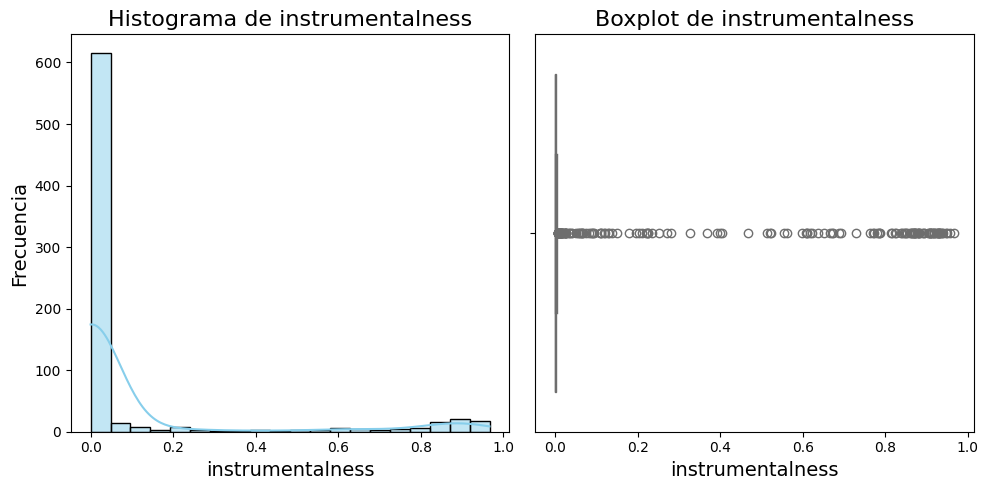

In [25]:
# Crear un gráfico para cada variable numérica con gráficos más grandes y letras más grandes
plt.figure(figsize=(10, 5))  # Aumentar el tamaño de los gráficos

variable = 'instrumentalness'

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(spotify_df_filter[variable], bins=20, kde=True, color='skyblue')
plt.title(f'Histograma de {variable}', fontsize=16)  # Aumentar el tamaño del título
plt.xlabel(variable, fontsize=14)  # Aumentar el tamaño del eje X
plt.ylabel('Frecuencia', fontsize=14)  # Aumentar el tamaño del eje Y

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=spotify_df_filter[variable], color='lightcoral')
plt.title(f'Boxplot de {variable}', fontsize=16)  # Aumentar el tamaño del título
plt.xlabel(variable, fontsize=14)  # Aumentar el tamaño del eje X

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()

### Probamos con una distribución uniforme

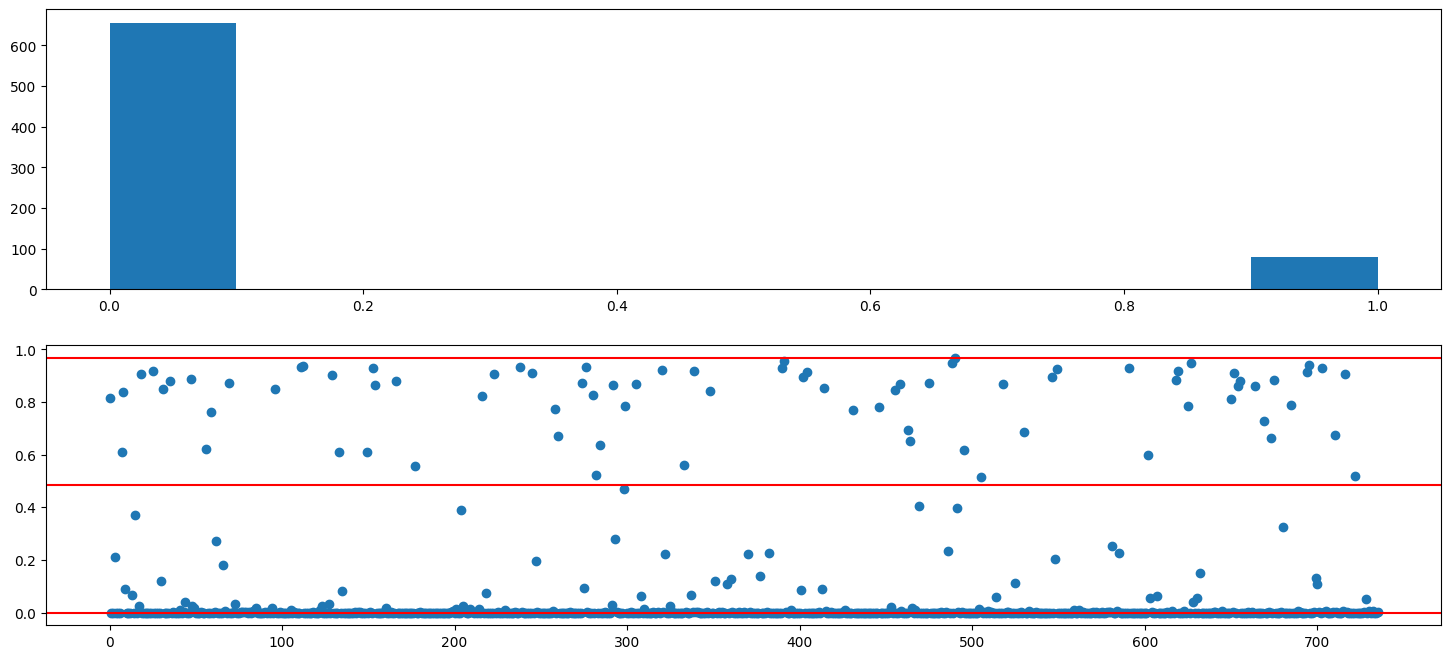

In [26]:
from sklearn.preprocessing import KBinsDiscretizer
import numpy as np
kbins = KBinsDiscretizer(n_bins=2, encode= 'ordinal' , strategy= 'uniform' )
data_tf_uniform = kbins.fit_transform(spotify_df_filter['instrumentalness'].values.reshape(-1,1))
fig,axes = plt.subplots(2,figsize=(18,8))
axes[0].hist(data_tf_uniform, bins=10);
axes[1].scatter(np.arange(0,spotify_df_filter['instrumentalness'].shape[0]),spotify_df_filter['instrumentalness'].values)
[axes[1].axhline(x,color='r') for x in kbins.bin_edges_[0]];

In [27]:
kbins.bin_edges_

array([array([0.    , 0.4835, 0.967 ])], dtype=object)

Vemos que quedan la mayoria de los datos en 0, y una menor proporción (pero no insignificativa) en 1, con un umbral ubicado en 0.4835

### Probamos con una distribución por cuantiles (cada bin tiene la misma cantidad de valores, el particionamiento se basa en percentiles)

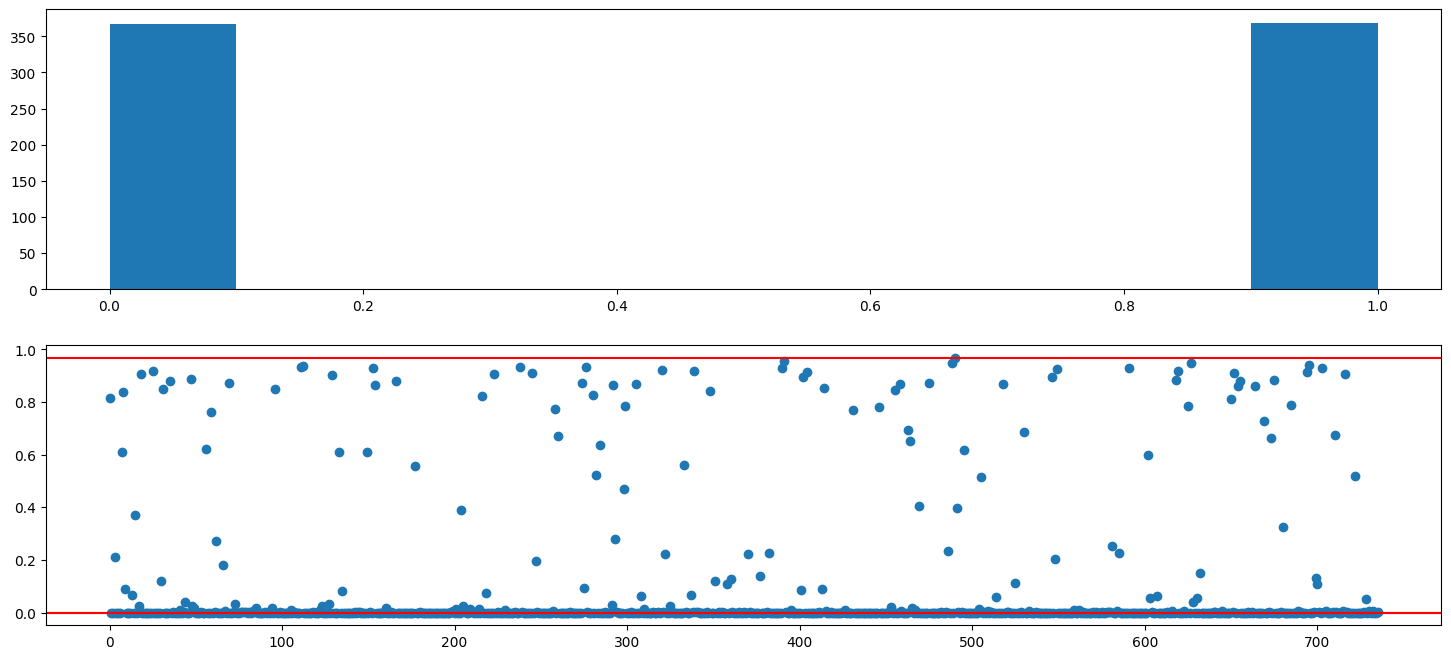

In [28]:
from sklearn.preprocessing import KBinsDiscretizer
import numpy as np
kbins = KBinsDiscretizer(n_bins=2, encode= 'ordinal' , strategy= 'quantile' )
data_tf_quantile = kbins.fit_transform(spotify_df_filter['instrumentalness'].values.reshape(-1,1))
fig,axes = plt.subplots(2,figsize=(18,8))
axes[0].hist(data_tf_quantile, bins=10);
axes[1].scatter(np.arange(0,spotify_df_filter['instrumentalness'].shape[0]),spotify_df_filter['instrumentalness'].values)
[axes[1].axhline(x,color='r') for x in kbins.bin_edges_[0]];

In [29]:
kbins.bin_edges_

array([array([0.00e+00, 1.02e-05, 9.67e-01])], dtype=object)

Vemos que ambos 'bins' quedan con la misma cantidad de muestras (368), pero el umbral es muy cercano a 0 ($1.02 10^{-5}$)

A partir de los resultados anteriores, creemos que la discretización más significativa es la del caso uniforme ya que nuclea la mayor cantidad de valores dentro del 0 (lo cual se corresponde con la realidad del dataset). Finalmente, podemos reemplazar la variable continua 'instrumentalness' por una variable binaria a partir del umbral desterminador por la discretización uniforme. 

In [30]:
spotify_df_filter['instrumentalness'] = data_tf_quantile

/tmp/ipykernel_324701/205764431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_df_filter['instrumentalness'] = data_tf_quantile


In [31]:
spotify_df_filter

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,0.713000,0.514,100125,0.521,1.0,8,0.1120,-14.835,0,0.0444,119.879,4,0.143,1
1,0.192000,0.714,207019,0.614,0.0,4,0.2630,-6.935,1,0.0319,123.969,4,0.582,1
2,0.333000,0.630,216200,0.455,0.0,5,0.1270,-9.290,1,0.0292,139.931,4,0.199,1
3,0.601000,0.810,136413,0.221,1.0,5,0.1840,-11.005,1,0.0429,109.960,4,0.798,1
4,0.883000,0.465,181440,0.459,1.0,6,0.0692,-8.137,0,0.0351,90.807,4,0.288,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0.000175,0.374,333827,0.943,1.0,6,0.1250,-4.108,0,0.0556,112.084,4,0.338,0
746,0.001970,0.487,213000,0.867,1.0,10,0.0968,-3.293,0,0.0543,160.048,4,0.403,0
747,0.916000,0.605,125867,0.314,0.0,0,0.3590,-7.631,1,0.0327,138.148,4,0.836,1
748,0.168000,0.700,249493,0.823,1.0,3,0.1220,-6.892,1,0.0373,144.060,4,0.745,1


Transformación de Variables y Selección de Features:

- Aplicar técnicas de conversión de variables donde sea necesario.
- Aplicar técnicas de escalamiento de ser necesario
- Realizar una selección de variables basándose en la relevancia y significancia de las mismas.
- Justificar la elección de las variables seleccionadas

# Encoding de variables categoricas

Los features key y time_signature, al ser variables categoricas pueden ser codificadas por medio de un encoder. Sin embargo, debido a que las mismas ya se encuentran codificadas por medio de numeros, este proceso no es necesario.

# Escalamiento de variables

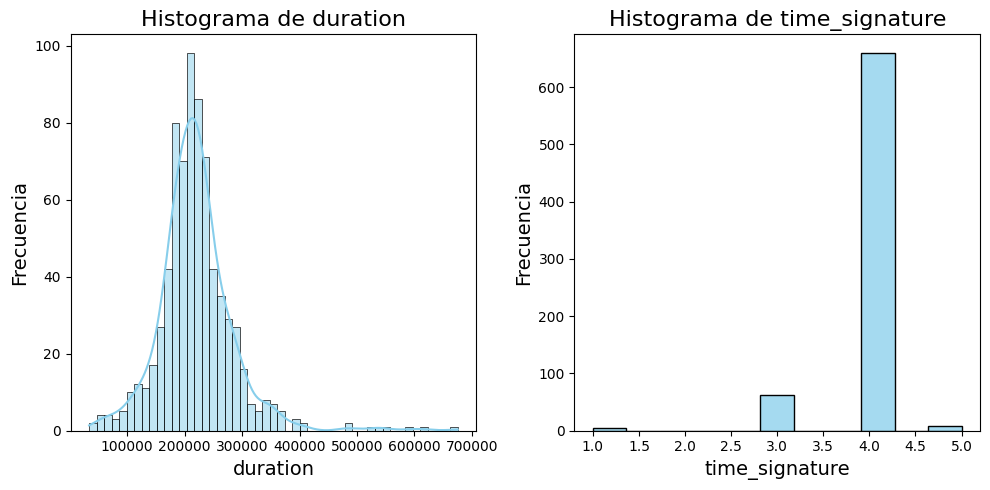

In [32]:
# Crear un gráfico para cada variable numérica con gráficos más grandes y letras más grandes
plt.figure(figsize=(10, 5))  # Aumentar el tamaño de los gráficos

variable = 'duration'

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(spotify_df_filter[variable], kde=True, color='skyblue')
plt.title(f'Histograma de {variable}', fontsize=16)  # Aumentar el tamaño del título
plt.xlabel(variable, fontsize=14)  # Aumentar el tamaño del eje X
plt.ylabel('Frecuencia', fontsize=14)  # Aumentar el tamaño del eje Y

variable = 'time_signature'
# Histograma
plt.subplot(1, 2, 2)
sns.histplot(spotify_df_filter[variable], color='skyblue')
plt.title(f'Histograma de {variable}', fontsize=16)  # Aumentar el tamaño del título
plt.xlabel(variable, fontsize=14)  # Aumentar el tamaño del eje X
plt.ylabel('Frecuencia', fontsize=14)  # Aumentar el tamaño del eje Y

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()

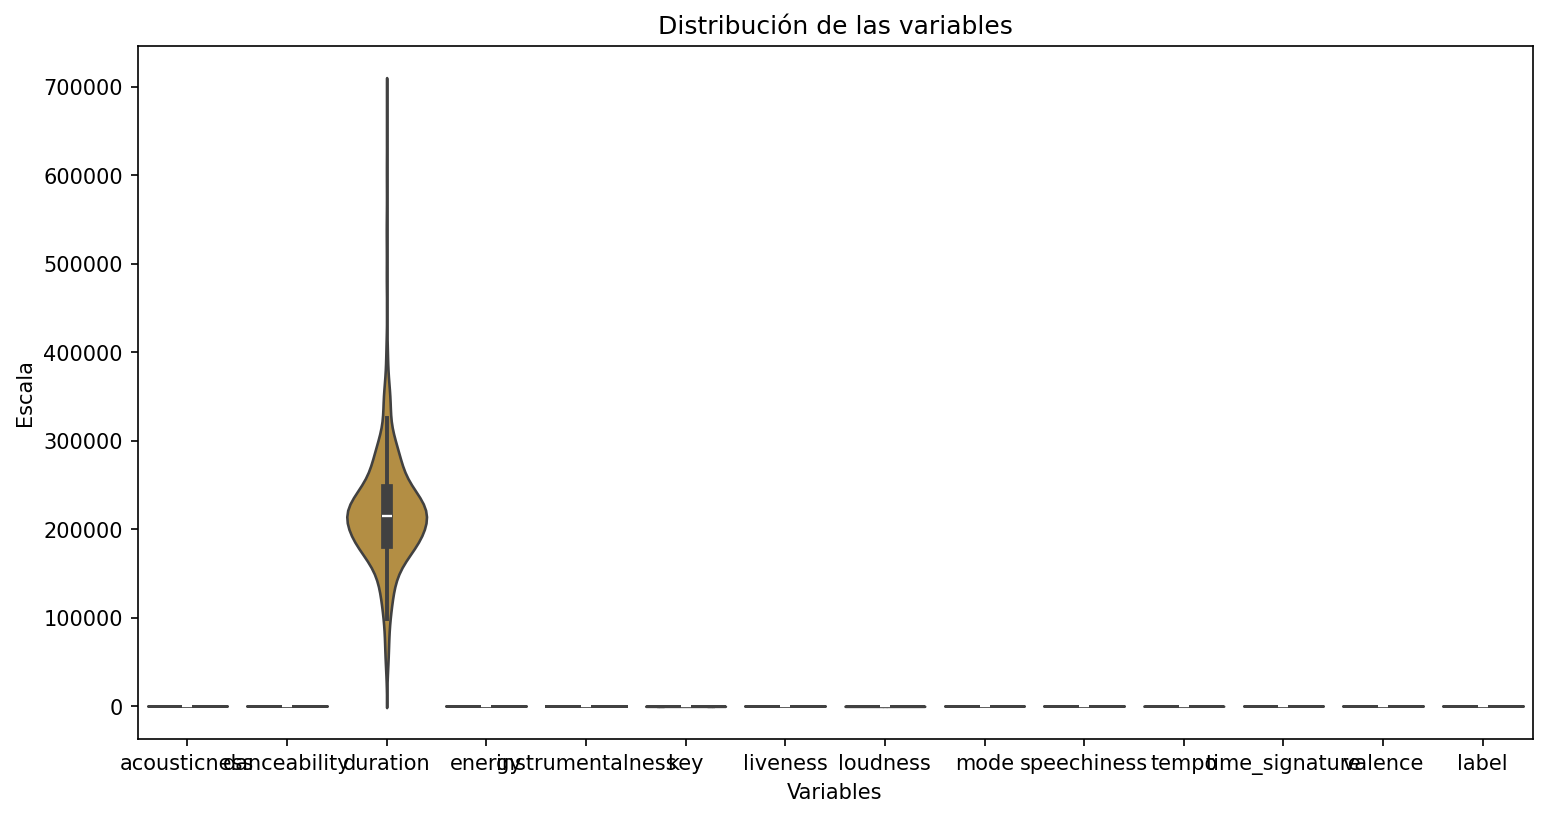

In [33]:
plt.figure( figsize = (12,6), dpi=150)
sns.violinplot( data=spotify_df_filter)
plt.ylabel("Escala")
plt.xlabel("Variables")
plt.title("Distribución de las variables")

plt.show() 

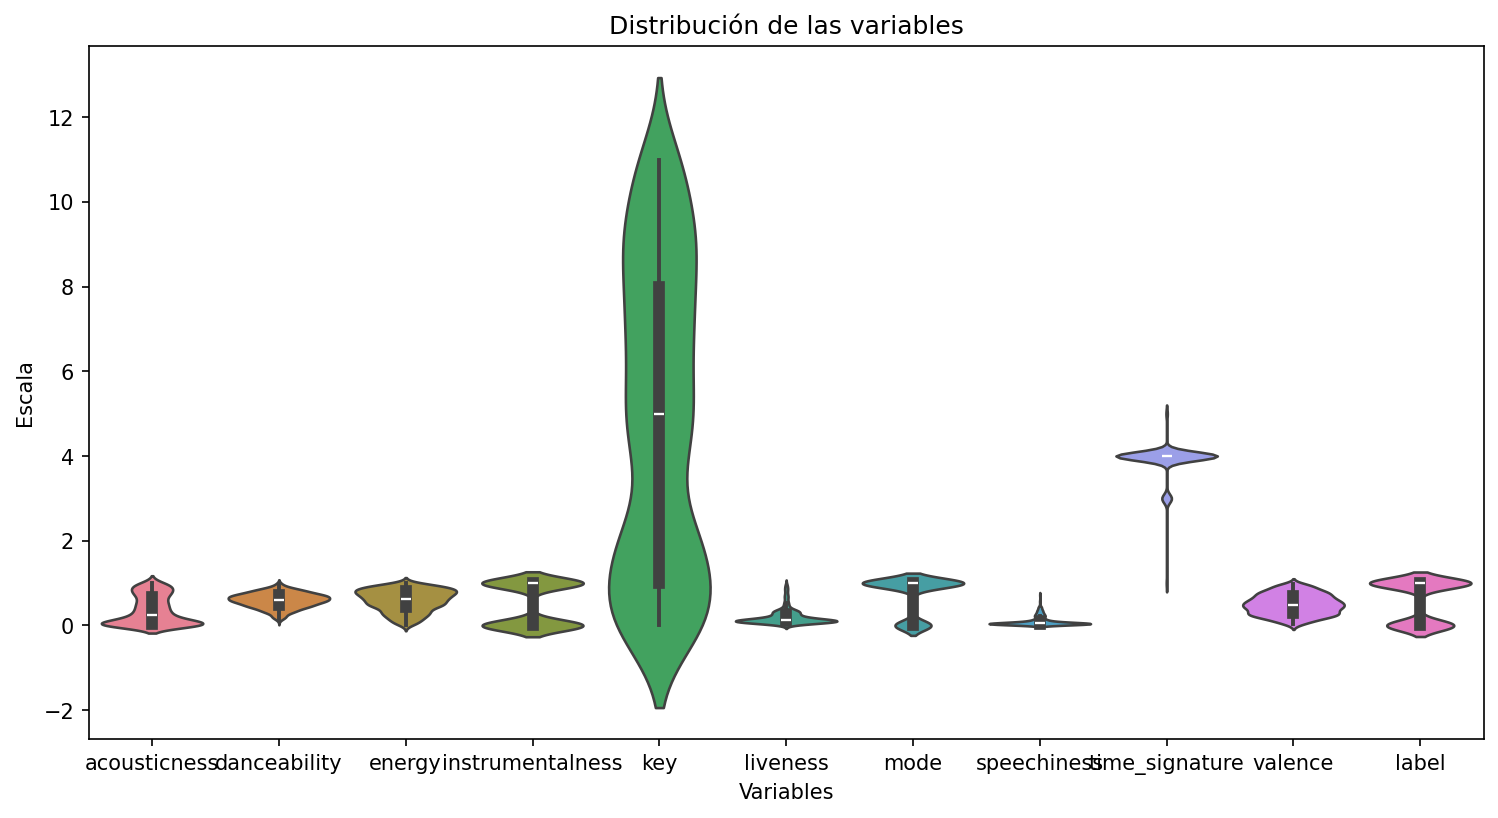

In [34]:
plt.figure( figsize = (12,6), dpi=150)
sns.violinplot( data=spotify_df_filter.drop(['duration','tempo','loudness'],axis=1))
plt.ylabel("Escala")
plt.xlabel("Variables")
plt.title("Distribución de las variables")

plt.show() 


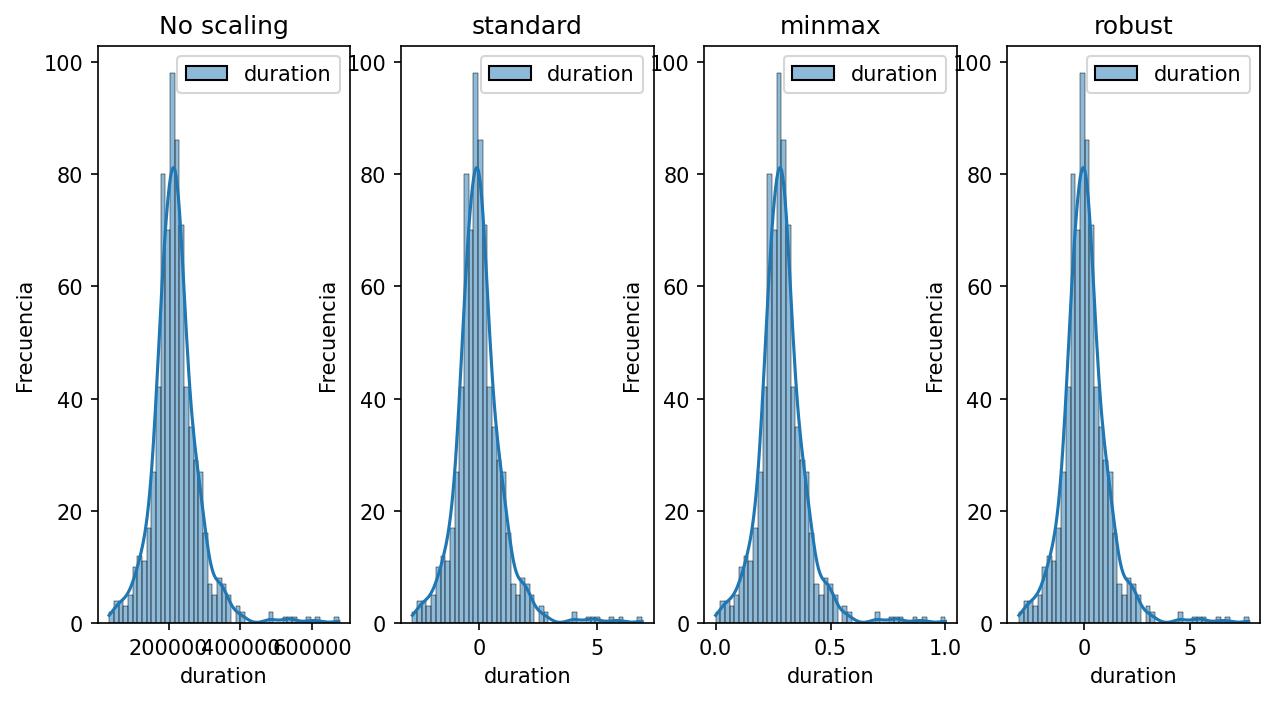

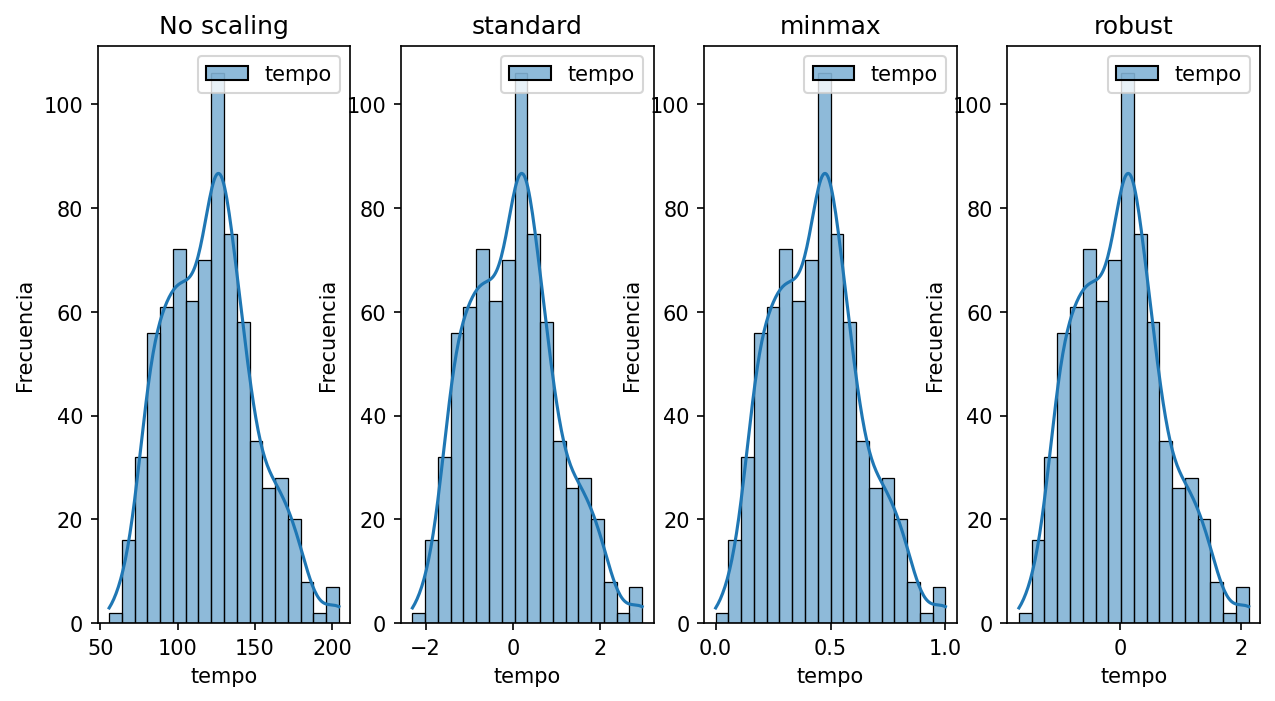

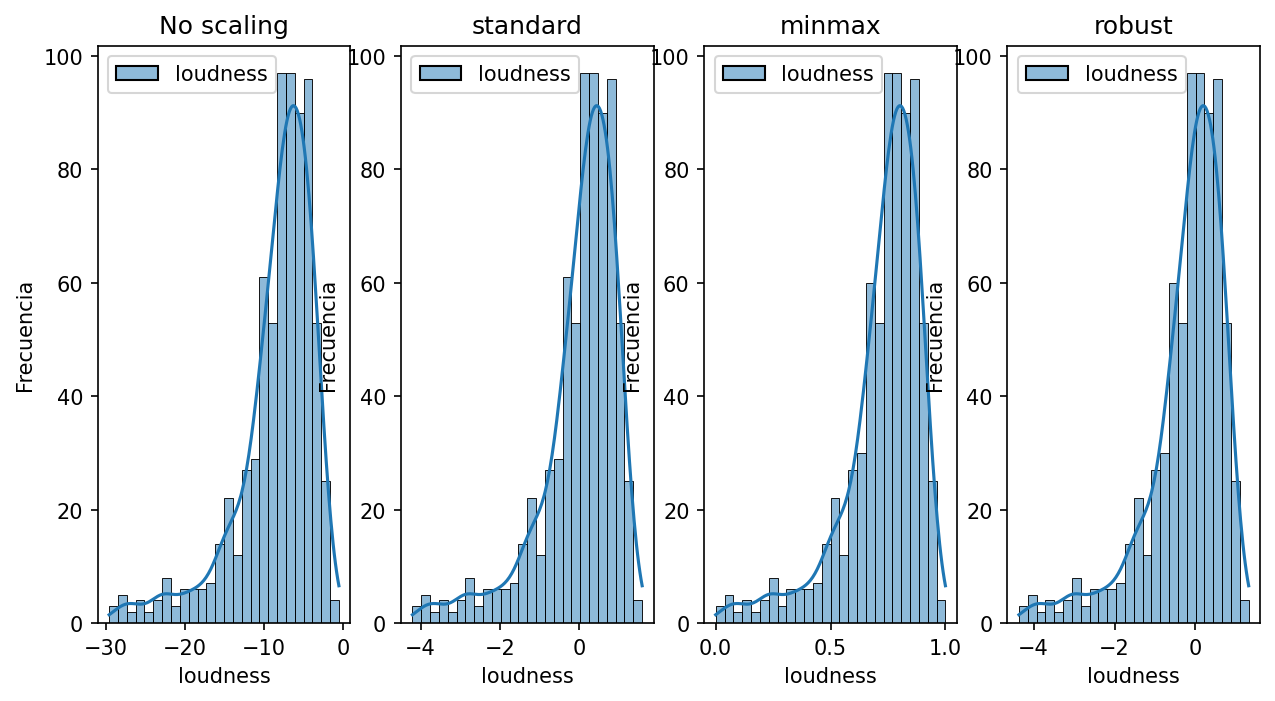

In [35]:
from sklearn.preprocessing import (
    KBinsDiscretizer,
    LabelEncoder,
    MinMaxScaler,
    Normalizer,
    OneHotEncoder,
    OrdinalEncoder,
    PowerTransformer,
    RobustScaler,
    StandardScaler,
)

# StandardScaler   -> promedio=0, desviacion estandar=1                       (cada feature)
# MinMaxScaler     -> escala valores de 0 a 1, (o rango pasado por parametro) (cada feature)
# RobustScaler     -> escala siendo robusto a outliers                        (cada feature)
# Normalizer       -> modifica los datos para que tengan norma=1              (cada fila) puede servir para calculos de ciertas distancias entre las isntancias como la distancia coseno

scalers = [
    ['standard',StandardScaler()],  # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
    ['minmax',MinMaxScaler()],  # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
    ['robust',RobustScaler()],  # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html
 #   Normalizer(),  # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html
]

variable = ['duration']
df_to_scale = spotify_df_filter[variable]
# Histograma
plt.figure( figsize = (10,5), dpi=150)
plt.subplot(1, 4, 1)
sns.histplot(spotify_df_filter[variable], kde=True, color='skyblue')
plt.xlabel('duration', fontsize=10)  # Aumentar el tamaño del eje X
plt.ylabel('Frecuencia', fontsize=10)  # Aumentar el tamaño del eje Y
plt.title('No scaling')


for i,scaler in enumerate(scalers):
    scaled_values = scaler[1].fit_transform(df_to_scale)
    scaled_values = pd.DataFrame(scaled_values, columns=variable)
    plt.subplot(1, 4, i+2)
    # sns.histplot(spotify_df_filter[variable], kde=True, color='skyblue')
    plt.xlabel('duration', fontsize=10)  # Aumentar el tamaño del eje X
    plt.ylabel('Frecuencia', fontsize=10)  # Aumentar el tamaño del eje Y
    plt.title(scaler[0])
    sns.histplot(scaled_values[variable], kde=True, color='skyblue')
    # plt.xlabel(variable, fontsize=14)  # Aumentar el tamaño del eje X
    # plt.ylabel('Frecuencia', fontsize=14)  # Aumentar el tamaño del eje Y
plt.show()

variable = ['tempo']
df_to_scale = spotify_df_filter[variable]
# Histograma
plt.figure( figsize = (10,5), dpi=150)
plt.subplot(1, 4, 1)
sns.histplot(spotify_df_filter[variable], kde=True, color='skyblue')
plt.xlabel('tempo', fontsize=10)  # Aumentar el tamaño del eje X
plt.ylabel('Frecuencia', fontsize=10)  # Aumentar el tamaño del eje Y
plt.title('No scaling')


for i,scaler in enumerate(scalers):
    scaled_values = scaler[1].fit_transform(df_to_scale)
    scaled_values = pd.DataFrame(scaled_values, columns=variable)
    plt.subplot(1, 4, i+2)
    # sns.histplot(spotify_df_filter[variable], kde=True, color='skyblue')
    plt.xlabel('tempo', fontsize=10)  # Aumentar el tamaño del eje X
    plt.ylabel('Frecuencia', fontsize=10)  # Aumentar el tamaño del eje Y
    plt.title(scaler[0])
    sns.histplot(scaled_values[variable], kde=True, color='skyblue')
    # plt.xlabel(variable, fontsize=14)  # Aumentar el tamaño del eje X
    # plt.ylabel('Frecuencia', fontsize=14)  # Aumentar el tamaño del eje Y
plt.show()

variable = ['loudness']
df_to_scale = spotify_df_filter[variable]
# Histograma
plt.figure( figsize = (10,5), dpi=150)
plt.subplot(1, 4, 1)
sns.histplot(spotify_df_filter[variable], kde=True, color='skyblue')
plt.xlabel('loudness', fontsize=10)  # Aumentar el tamaño del eje X
plt.ylabel('Frecuencia', fontsize=10)  # Aumentar el tamaño del eje Y
plt.title('No scaling')


for i,scaler in enumerate(scalers):
    scaled_values = scaler[1].fit_transform(df_to_scale)
    scaled_values = pd.DataFrame(scaled_values, columns=variable)
    plt.subplot(1, 4, i+2)
    # sns.histplot(spotify_df_filter[variable], kde=True, color='skyblue')
    plt.xlabel('loudness', fontsize=10)  # Aumentar el tamaño del eje X
    plt.ylabel('Frecuencia', fontsize=10)  # Aumentar el tamaño del eje Y
    plt.title(scaler[0])
    sns.histplot(scaled_values[variable], kde=True, color='skyblue')
    # plt.xlabel(variable, fontsize=14)  # Aumentar el tamaño del eje X
    # plt.ylabel('Frecuencia', fontsize=14)  # Aumentar el tamaño del eje Y
plt.show()




Para ambos casos utilizamos el standard scaler con el fin de dejar todas las variables comparables entre si.



In [36]:
spotify_df_filter

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,0.713000,0.514,100125,0.521,1.0,8,0.1120,-14.835,0,0.0444,119.879,4,0.143,1
1,0.192000,0.714,207019,0.614,0.0,4,0.2630,-6.935,1,0.0319,123.969,4,0.582,1
2,0.333000,0.630,216200,0.455,0.0,5,0.1270,-9.290,1,0.0292,139.931,4,0.199,1
3,0.601000,0.810,136413,0.221,1.0,5,0.1840,-11.005,1,0.0429,109.960,4,0.798,1
4,0.883000,0.465,181440,0.459,1.0,6,0.0692,-8.137,0,0.0351,90.807,4,0.288,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0.000175,0.374,333827,0.943,1.0,6,0.1250,-4.108,0,0.0556,112.084,4,0.338,0
746,0.001970,0.487,213000,0.867,1.0,10,0.0968,-3.293,0,0.0543,160.048,4,0.403,0
747,0.916000,0.605,125867,0.314,0.0,0,0.3590,-7.631,1,0.0327,138.148,4,0.836,1
748,0.168000,0.700,249493,0.823,1.0,3,0.1220,-6.892,1,0.0373,144.060,4,0.745,1


In [37]:
spotify_df_filter_scaler = spotify_df_filter.drop(['duration','tempo','loudness'],axis=1)
spotify_df_filter_scaler

scaler = MinMaxScaler()  # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

variable = ['duration']
scaled_duration = scaler.fit_transform(spotify_df_filter[variable])
scaled_duration = pd.DataFrame(scaled_duration, columns=variable)


variable = ['tempo']
scaled_tempo = scaler.fit_transform(spotify_df_filter[variable])
scaled_tempo = pd.DataFrame(scaled_tempo, columns=variable)


variable = ['loudness']
scaled_loudness = scaler.fit_transform(spotify_df_filter[variable])
scaled_loudness = pd.DataFrame(scaled_loudness, columns=variable)

spotify_df_filter_scaler['duration'] = scaled_duration
spotify_df_filter_scaler['tempo'] = scaled_tempo
spotify_df_filter_scaler['loudness'] = scaled_loudness


spotify_df_filter_scaler


,acousticness,danceability,energy,instrumentalness,key,liveness,mode,speechiness,time_signature,valence,label,duration,tempo,loudness
0,0.713000,0.514,0.521,1.0,8,0.1120,0,0.0444,4,0.143,1,0.103325,0.432113,0.507981
1,0.192000,0.714,0.614,0.0,4,0.2630,1,0.0319,4,0.582,1,0.269951,0.459671,0.779758
2,0.333000,0.630,0.455,0.0,5,0.1270,1,0.0292,4,0.199,1,0.284262,0.567220,0.698741
3,0.601000,0.810,0.221,1.0,5,0.1840,1,0.0429,4,0.798,1,0.159891,0.365280,0.639741
4,0.883000,0.465,0.459,1.0,6,0.0692,0,0.0351,4,0.288,1,0.230079,0.236229,0.738406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0.000175,0.374,0.943,1.0,6,0.1250,0,0.0556,4,0.338,0,NaN,NaN,NaN
746,0.001970,0.487,0.867,1.0,10,0.0968,0,0.0543,4,0.403,0,NaN,NaN,NaN
747,0.916000,0.605,0.314,0.0,0,0.3590,1,0.0327,4,0.836,1,NaN,NaN,NaN
748,0.168000,0.700,0.823,1.0,3,0.1220,1,0.0373,4,0.745,1,NaN,NaN,NaN


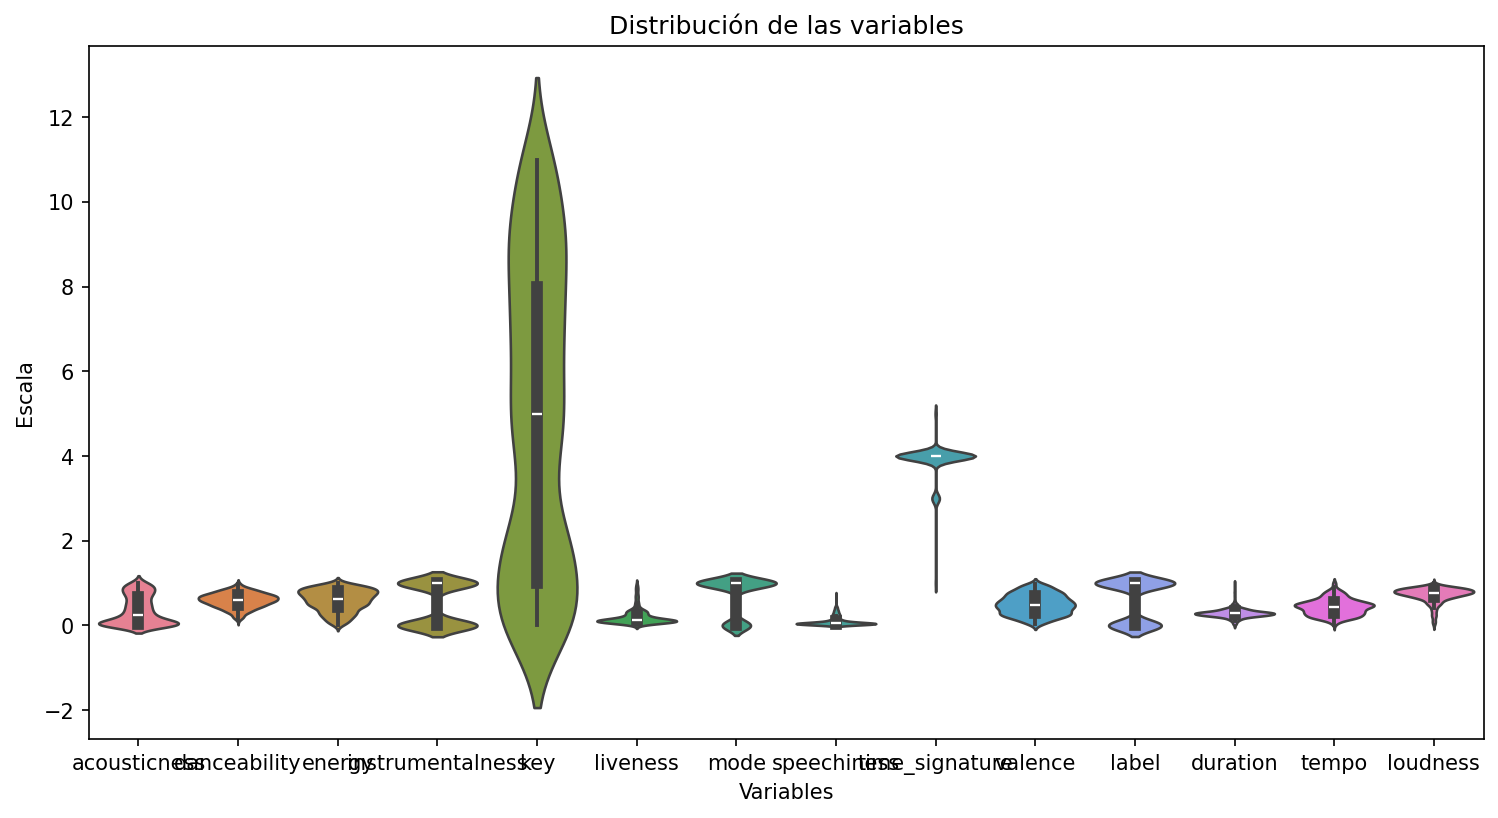

In [38]:
plt.figure( figsize = (12,6), dpi=150)
sns.violinplot( data=spotify_df_filter_scaler)
plt.ylabel("Escala")
plt.xlabel("Variables")
plt.title("Distribución de las variables")

plt.show() 

# Reducción de features por medio de variables correlacionadas

Aunque exista una correlación mayor al 0.8 entre loudness y energy la misma no es suficiente para poder desprendernos de una las mismas

# Feature Engineering

Para determinar cuales son los features más importantes y poder desprendernos de los menos, vamos a aplicar dos tecnicas: RFE y feature_importances de XGBoost

In [39]:
# Separamos el dataset
from sklearn.model_selection import train_test_split

variables = ['acousticness', 'danceability','duration', 'energy', 
                       'valence', 'tempo', 'instrumentalness',
                        'key', 'loudness', 'speechiness', 'liveness','mode','time_signature']


spotify_target = spotify_df_filter_scaler['label']
spotify_data = spotify_df_filter_scaler[variables]

X_train, X_test, y_train, y_test = train_test_split(spotify_data, spotify_target, test_size=0.2, random_state=42)

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

# Entrenar el modelo Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [41]:
# Predecir y evaluar el modelo con todas las características
y_pred_all_features = model.predict(X_test)
accuracy_all_features = accuracy_score(y_test, y_pred_all_features)
print(f'Precisión con todas las características: {accuracy_all_features:.2f}')

Precisión con todas las características: 0.78


Importancia de las características:
             Feature  Importance
12           valence    0.000000
11    time_signature    0.002071
10             tempo    0.008798
6           liveness    0.015715
7           loudness    0.021928
8               mode    0.024351
5                key    0.033862
4   instrumentalness    0.035361
2           duration    0.045202
1       danceability    0.090475
0       acousticness    0.138389
3             energy    0.236881
9        speechiness    0.346969


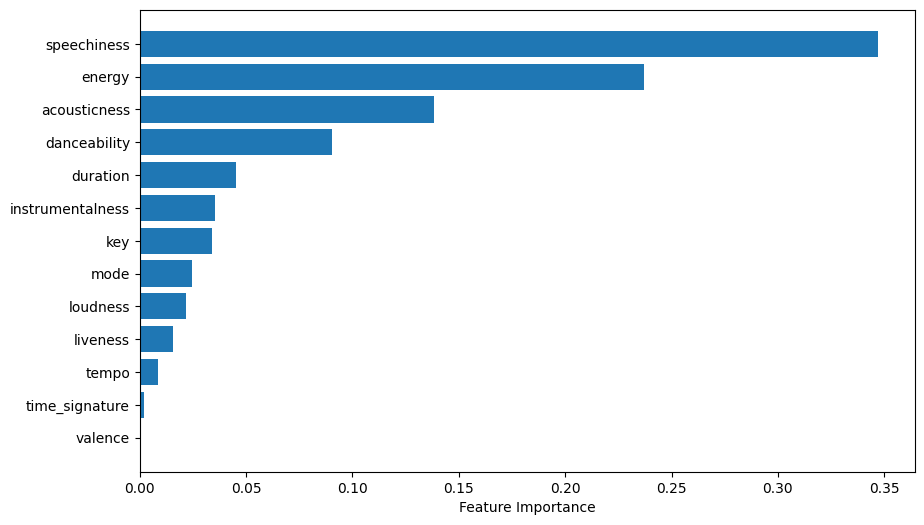

In [42]:
# Obtener la importancia de las características
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)
# Mostrar la importancia de las características
print("Importancia de las características:")
print(feature_importance_df)


# # Ordenamos los índices
# sorted_idx = feature_importance_df.argsort()

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], align='center')
plt.xlabel('Feature Importance')
plt.show()



In [43]:
import xgboost as xgb
from sklearn.metrics import (mean_absolute_error, r2_score,
                             root_mean_squared_error, 
                             mean_absolute_percentage_error)

# Inicializamos XGBoost con sus hiperparámetros por defecto
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)
xgb_regressor.fit(X_train, y_train)

# Calculamos las métricas
y_pred_xgb = xgb_regressor.predict(X_test)

metrics_xgb = {
    "name": "XGBoost",
    "MAE_training": mean_absolute_error(y_train, xgb_regressor.predict(X_train)),
    "MAE": mean_absolute_error(y_test, y_pred_xgb),
    "RMSE": root_mean_squared_error(y_test, y_pred_xgb),
    "MAPE": mean_absolute_percentage_error(y_test, y_pred_xgb),    
    "R2": r2_score(y_test, y_pred_xgb)
}

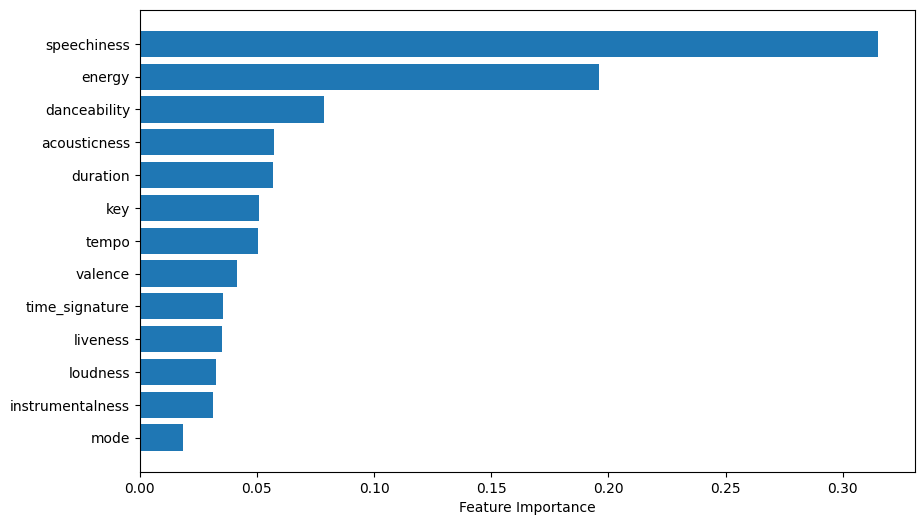

In [44]:
# Obtenemos la importancia de características
feature_importances = xgb_regressor.feature_importances_
feature_names = variables

# Ordenamos los índices
sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.show()

A partir de los modelos presentados anteriormente podemos observar que en ambos casos los features que menor informacion aportan son:
- Valence
- Time_signature
- Liveness
- Loudness
- Mode

A su vez vemos que la mayor cantidad de información en ambos casos esta contenida en los features:
- Speechiness
- Energy
- Daceability
- Acousticness

Por lo cual podriamos probar dos datasets: uno sin los features mencionados en la primer lista y otro que contenga únicamente los features de la segunda lista, para evaluar su desempeño.



In [45]:
spotify_df_filter_scaler_feat_eng = spotify_df_filter_scaler.drop(['valence','time_signature','liveness','loudness','mode'],axis=1)
